In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1402 = pd.read_excel("1402.xlsx",header = [0,1])
df_1403 = pd.read_excel("1403.xlsx",header = [0,1])

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
df = pd.read_excel("1401.xlsx",header = [0,1])

In [5]:
df.head()

نام مشترک          کد اشتراک         نوع پروانه  \
          Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  آرمند بتن             520009              صنعتی   
1   ابوالفضل  خورسند اترآباد             200654            کشاورزی   
2        ابوالفضل  مقرب زاده             622162            کشاورزی   
3        احمد  ابراهیمی مقدم             515618            کشاورزی   
4      احمد  جوپای ناجی آباد             529232            کشاورزی   

               استان            شهرستان            امور آب    محدوده مطالعاتی  \
  Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1   
0        خراسان رضوی               مشهد                NaN                NaN   
1        خراسان رضوی              قوچان                NaN                NaN   
2        خراسان رضوی        تربت حیدریه                NaN                NaN   
3        خراسان رضوی               مشهد                NaN                NaN   
4        خراسان رضوی               مشهد                NaN                NaN   

         سریال کنتور         سایز کنتور          تاریخ نصب  ...  \
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1  ...   
0       909801058196                 50         1402/11/15  ...   
1       909801034787                 80         1400/02/12  ...   
2       909801061701                 50         1403/02/27  ...   
3       909801035022                125         1400/02/30  ...   
4       909801046032                125         1401/06/23  ...   

            1401/11                    1401/12                               \
  تعداد مورد انتظار درصد اطلاعات موجود دبی l/s تعداد دبی منفی درصد دبی منفی   
0                30            0.00000     NaN              0             0   
1                30          100.00000 1.06000              0             0   
2                30            0.00000     NaN              0             0   
3                30            0.00000     NaN              0             0   
4                30          100.00000 5.78000              0             0   

                                                                        \
  ساعت کارکرد (h) مصرف (m³) (m³) تعداد اطلاعات موجود تعداد مورد انتظار   
0             NaN            NaN                   0                29   
1     17190.70000      638.81000                  29                29   
2             NaN            NaN                   0                29   
3             NaN            NaN                   0                29   
4     26865.20000    14161.93000                  29                29   

                      
  درصد اطلاعات موجود  
0            0.00000  
1          100.00000  
2            0.00000  
3            0.00000  
4          100.00000  

[5 rows x 111 columns]

In [6]:
column_translations = {
    "Unnamed: 1_level_1" : 'Subscription Code',
    'کد اشتراک': 'Subscription Code',
    'نوع پروانه': 'License Type',
    'شهرستان': 'County',
    'سریال کنتور': 'Meter Serial',
    'سایز کنتور': 'Meter Size',
    'تاریخ نصب': 'Installation Date',
    'زمان آخرین اتصال': 'Last Connection Time',
    'مصرف بازه (m³)': 'Consumption in Period (m³)',
    'ساعت کارکرد بازه (h)': 'Operating Hours in Period (h)',
    'میانگین دبی بازه l/s': 'Average Flow Rate in Period (l/s)',
    'دبی l/s': 'Flow Rate (l/s)',
    'تعداد دبی منفی': 'Number of Negative Flows',
    'درصد دبی منفی': 'Percentage of Negative Flows',
    'ساعت کارکرد (h)': 'Operating Hours (h)',
    'مصرف (m³) (m³)': 'Consumption (m³)',
    'تعداد اطلاعات موجود': 'Number of Available Data Points',
}

In [7]:
print(df_1403.columns)

MultiIndex([(      'نام مشترک',  'Unnamed: 0_level_1'),
            (      'کد اشتراک',  'Unnamed: 1_level_1'),
            (     'نوع پروانه',  'Unnamed: 2_level_1'),
            (          'استان',  'Unnamed: 3_level_1'),
            (        'شهرستان',  'Unnamed: 4_level_1'),
            (        'امور آب',  'Unnamed: 5_level_1'),
            ('محدوده مطالعاتی',  'Unnamed: 6_level_1'),
            (    'سریال کنتور',  'Unnamed: 7_level_1'),
            (     'سایز کنتور',  'Unnamed: 8_level_1'),
            (      'تاریخ نصب',  'Unnamed: 9_level_1'),
            ...
            (        '1403/11',   'تعداد مورد انتظار'),
            (        '1403/11',  'درصد اطلاعات موجود'),
            (        '1403/12',             'دبی l/s'),
            (        '1403/12',      'تعداد دبی منفی'),
            (        '1403/12',       'درصد دبی منفی'),
            (        '1403/12',     'ساعت کارکرد (h)'),
            (        '1403/12',      'مصرف (m³) (m³)'),
            (        '1403/12', 

In [8]:
df_1402.columns

MultiIndex([(      'نام مشترک',  'Unnamed: 0_level_1'),
            (      'کد اشتراک',  'Unnamed: 1_level_1'),
            (     'نوع پروانه',  'Unnamed: 2_level_1'),
            (          'استان',  'Unnamed: 3_level_1'),
            (        'شهرستان',  'Unnamed: 4_level_1'),
            (        'امور آب',  'Unnamed: 5_level_1'),
            ('محدوده مطالعاتی',  'Unnamed: 6_level_1'),
            (    'سریال کنتور',  'Unnamed: 7_level_1'),
            (     'سایز کنتور',  'Unnamed: 8_level_1'),
            (      'تاریخ نصب',  'Unnamed: 9_level_1'),
            ...
            (        '1402/11',   'تعداد مورد انتظار'),
            (        '1402/11',  'درصد اطلاعات موجود'),
            (        '1402/12',             'دبی l/s'),
            (        '1402/12',      'تعداد دبی منفی'),
            (        '1402/12',       'درصد دبی منفی'),
            (        '1402/12',     'ساعت کارکرد (h)'),
            (        '1402/12',      'مصرف (m³) (m³)'),
            (        '1402/12', 

In [9]:
df_1403

نام مشترک          کد اشتراک         نوع پروانه  \
             Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                     آرمند بتن             520009              صنعتی   
1      ابوالفضل  خورسند اترآباد             200654            کشاورزی   
2           ابوالفضل  مقرب زاده             622162            کشاورزی   
3           احمد  ابراهیمی مقدم             515618            کشاورزی   
4         احمد  جوپای ناجی آباد             529232            کشاورزی   
...                         ...                ...                ...   
2213              یعقوب  ریاحی              925247            کشاورزی   
2214     یعقوبعلی هاتفی اردکانی             518473            کشاورزی   
2215                یوسف  امانی             201250                NaN   
2216               یوسف  گلزاری             925005            کشاورزی   
2217      ﺷﺮﮐﺖ ﭘﺎرس ﻓﻮﻻد ﺳﺒﺰوار             102290                NaN   

                  استان            شهرستان            امور آب  \
     Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
0           خراسان رضوی               مشهد                NaN   
1           خراسان رضوی              قوچان                NaN   
2           خراسان رضوی        تربت حیدریه                NaN   
3           خراسان رضوی               مشهد                NaN   
4           خراسان رضوی               مشهد                NaN   
...                 ...                ...                ...   
2213        خراسان رضوی              باخرز                NaN   
2214        خراسان رضوی               مشهد                NaN   
2215        خراسان رضوی              قوچان                NaN   
2216        خراسان رضوی              باخرز                NaN   
2217        خراسان رضوی             سبزوار                NaN   

        محدوده مطالعاتی        سریال کنتور         سایز کنتور  \
     Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1   
0                   NaN       909801058196                 50   
1                   NaN       909801034787                 80   
2                   NaN       909801061701                 50   
3                   NaN       909801035022                125   
4                   NaN       909801046032                125   
...                 ...                ...                ...   
2213                NaN       909801035013                 50   
2214                NaN       909801032684                100   
2215                NaN       909801032982                 50   
2216                NaN       909801035005                100   
2217                NaN       909801059164                150   

              تاریخ نصب  ...           1403/11                     1403/12  \
     Unnamed: 9_level_1  ... تعداد مورد انتظار درصد اطلاعات موجود  دبی l/s   
0            1402/11/15  ...                30          100.00000  1.96000   
1            1400/02/12  ...                30          100.00000  0.55000   
2            1403/02/27  ...                30            0.00000      NaN   
3            1400/02/30  ...                30          100.00000  5.84000   
4            1401/06/23  ...                30            0.00000      NaN   
...                 ...  ...               ...                ...      ...   
2213         1400/03/24  ...                30            0.00000      NaN   
2214         1399/06/03  ...                30          100.00000  5.44000   
2215         1399/07/07  ...                30          100.00000      NaN   
2216         1400/03/03  ...                30            0.00000      NaN   
2217         1402/12/15  ...                30          100.00000 32.17000   

                                                                  \
     تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³)   
0                 0             0       103.60000      696.93000   
1                 0             0         0.10000       -0.28000   
2                 0             0             NaN            NaN   
3                 0      

In [10]:
inf_cols = df.columns[:15] 
df_info = df[inf_cols]

In [11]:
usage_cols = df.columns[15:] 
df_usage = df[usage_cols]

In [12]:
df_1402_usage = df_1402[df_1402.columns[15:]]
df_1403_usage = df_1403[df_1403.columns[15:]]

In [13]:
df_info.shape , df_usage.shape

((2218, 15), (2218, 96))

In [14]:
df_1402.head()

نام مشترک          کد اشتراک         نوع پروانه  \
          Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  آرمند بتن             520009              صنعتی   
1   ابوالفضل  خورسند اترآباد             200654            کشاورزی   
2        ابوالفضل  مقرب زاده             622162            کشاورزی   
3        احمد  ابراهیمی مقدم             515618            کشاورزی   
4      احمد  جوپای ناجی آباد             529232            کشاورزی   

               استان            شهرستان            امور آب    محدوده مطالعاتی  \
  Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1   
0        خراسان رضوی               مشهد                NaN                NaN   
1        خراسان رضوی              قوچان                NaN                NaN   
2        خراسان رضوی        تربت حیدریه                NaN                NaN   
3        خراسان رضوی               مشهد                NaN                NaN   
4        خراسان رضوی               مشهد                NaN                NaN   

         سریال کنتور         سایز کنتور          تاریخ نصب  ...  \
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1  ...   
0       909801058196                 50         1402/11/15  ...   
1       909801034787                 80         1400/02/12  ...   
2       909801061701                 50         1403/02/27  ...   
3       909801035022                125         1400/02/30  ...   
4       909801046032                125         1401/06/23  ...   

            1402/11                    1402/12                               \
  تعداد مورد انتظار درصد اطلاعات موجود دبی l/s تعداد دبی منفی درصد دبی منفی   
0                30          100.00000 1.43000              0       0.00000   
1                30          100.00000 0.80000              0       0.00000   
2                30            0.00000     NaN              0       0.00000   
3                30            0.00000     NaN              0       0.00000   
4                30            0.00000     NaN              0       0.00000   

                                                                        \
  ساعت کارکرد (h) مصرف (m³) (m³) تعداد اطلاعات موجود تعداد مورد انتظار   
0      3066.90000     1018.79900                  29                29   
1             NaN        0.27000                  29                29   
2             NaN            NaN                   0                29   
3             NaN            NaN                   0                29   
4             NaN            NaN                   0                29   

                      
  درصد اطلاعات موجود  
0          100.00000  
1          100.00000  
2            0.00000  
3            0.00000  
4            0.00000  

[5 rows x 111 columns]

In [15]:
df_info.head()

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1,Unnamed: 14_level_1
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.93000,343575.40000,1.15000
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.60000,475073.20000,6.91000
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.69000,68022.10000,6.00000


In [16]:
df_usage.head()

1401/01                                                              \
  دبی l/s تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³)   
0     NaN              0       0.00000             NaN            NaN   
1 1.38000              0       0.00000     16492.80000     2727.77000   
2     NaN              0       0.00000             NaN            NaN   
3 7.05000              0       0.00000     29319.60000    14647.50000   
4     NaN              0       0.00000             NaN            NaN   

                                                           1401/02  \
  تعداد اطلاعات موجود تعداد مورد انتظار درصد اطلاعات موجود دبی l/s   
0                   0                31            0.00000     NaN   
1                  31                31          100.00000 1.27000   
2                   0                31            0.00000     NaN   
3                  31                31          100.00000 6.11000   
4                   0                31            0.00000     NaN   

                  ...           1401/11                    1401/12  \
  تعداد دبی منفی  ... تعداد مورد انتظار درصد اطلاعات موجود دبی l/s   
0              0  ...                30            0.00000     NaN   
1              0  ...                30          100.00000 1.06000   
2              0  ...                30            0.00000     NaN   
3              0  ...                30            0.00000     NaN   
4              0  ...                30          100.00000 5.78000   

                                                               \
  تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³)   
0              0             0             NaN            NaN   
1              0             0     17190.70000      638.81000   
2              0             0             NaN            NaN   
3              0             0             NaN            NaN   
4              0             0     26865.20000    14161.93000   

                                                            
  تعداد اطلاعات موجود تعداد مورد انتظار درصد اطلاعات موجود  
0                   0                29            0.00000  
1                  29                29          100.00000  
2                   0                29            0.00000  
3                   0                29            0.00000  
4                  29                29          100.00000  

[5 rows x 96 columns]

In [17]:
usage_cols = df_usage.columns[15:]

In [18]:
usage_cols

MultiIndex([('1401/02',  'درصد اطلاعات موجود'),
            ('1401/03',             'دبی l/s'),
            ('1401/03',      'تعداد دبی منفی'),
            ('1401/03',       'درصد دبی منفی'),
            ('1401/03',     'ساعت کارکرد (h)'),
            ('1401/03',      'مصرف (m³) (m³)'),
            ('1401/03', 'تعداد اطلاعات موجود'),
            ('1401/03',   'تعداد مورد انتظار'),
            ('1401/03',  'درصد اطلاعات موجود'),
            ('1401/04',             'دبی l/s'),
            ('1401/04',      'تعداد دبی منفی'),
            ('1401/04',       'درصد دبی منفی'),
            ('1401/04',     'ساعت کارکرد (h)'),
            ('1401/04',      'مصرف (m³) (m³)'),
            ('1401/04', 'تعداد اطلاعات موجود'),
            ('1401/04',   'تعداد مورد انتظار'),
            ('1401/04',  'درصد اطلاعات موجود'),
            ('1401/05',             'دبی l/s'),
            ('1401/05',      'تعداد دبی منفی'),
            ('1401/05',       'درصد دبی منفی'),
            ('1401/05',     'ساعت کارکرد

In [19]:
months = df_usage.columns.levels[0][:12]

In [20]:
months

Index(['1401/01', '1401/02', '1401/03', '1401/04', '1401/05', '1401/06',
       '1401/07', '1401/08', '1401/09', '1401/10', '1401/11', '1401/12'],
      dtype='object')

In [21]:
df_usage = pd.concat([df_info[['نام مشترک','کد اشتراک']],df_usage] , axis = 1)

In [22]:
df_1402_info = df_1402[inf_cols]
df_1403_info = df_1403[inf_cols]

In [23]:
df_usage

نام مشترک          کد اشتراک  1401/01                 \
             Unnamed: 0_level_1 Unnamed: 1_level_1  دبی l/s تعداد دبی منفی   
0                     آرمند بتن             520009      NaN              0   
1      ابوالفضل  خورسند اترآباد             200654  1.38000              0   
2           ابوالفضل  مقرب زاده             622162      NaN              0   
3           احمد  ابراهیمی مقدم             515618  7.05000              0   
4         احمد  جوپای ناجی آباد             529232      NaN              0   
...                         ...                ...      ...            ...   
2213              یعقوب  ریاحی              925247      NaN              0   
2214     یعقوبعلی هاتفی اردکانی             518473 12.84000              0   
2215                یوسف  امانی             201250      NaN              0   
2216               یوسف  گلزاری             925005 21.69000              0   
2217      ﺷﺮﮐﺖ ﭘﺎرس ﻓﻮﻻد ﺳﺒﺰوار             102290      NaN              0   

                                                                       \
     درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³) تعداد اطلاعات موجود   
0          0.00000             NaN            NaN                   0   
1          0.00000     16492.80000     2727.77000                  31   
2          0.00000             NaN            NaN                   0   
3          0.00000     29319.60000    14647.50000                  31   
4          0.00000             NaN            NaN                   0   
...            ...             ...            ...                 ...   
2213       0.00000         0.00000        0.00000                  31   
2214       0.00000    106320.60000    32388.00000                  31   
2215       0.00000         0.00000        0.00000                  31   
2216       0.00000     39729.80000    58070.90000                  31   
2217       0.00000             NaN            NaN                   0   

                                           ...           1401/11  \
     تعداد مورد انتظار درصد اطلاعات موجود  ... تعداد مورد انتظار   
0                   31            0.00000  ...                30   
1                   31          100.00000  ...                30   
2                   31            0.00000  ...                30   
3                   31          100.00000  ...                30   
4                   31            0.00000  ...                30   
...                ...                ...  ...               ...   
2213                31          100.00000  ...                30   
2214                31          100.00000  ...                30   
2215                31          100.00000  ...                30   
2216                31          100.00000  ...                30   
2217                31            0.00000  ...                30   

                         1401/12                                               \
     درصد اطلاعات موجود  دبی l/s تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h)   
0               0.00000      NaN              0             0             NaN   
1             100.00000  1.06000              0             0     17190.70000   
2               0.00000      NaN              0             0             NaN   
3               0.00000      NaN              0             0             NaN   
4             100.00000  5.78000              0             0     26865.20000   
...                 ...      ...            ...           ...             ...   
2213          100.00000  2.27000              0             0     36518.00000   
2214            0.00000      NaN              0             0             NaN   
2215          100.00000      NaN              0             0             NaN   
2216          100.00000 26.53000              0             0     81798.80000   
2217            0.00000      NaN              0             0             NaN   

                                                                              
     مصرف (m³) (m³) تعداد اطلاعات موجود

In [24]:
df_long = pd.DataFrame()
for i in months:
    temp_df = pd.DataFrame()
    month_temp = pd.DataFrame({"month":[str(i) for j in range(len(df_usage[i]))]})
    temp_df = pd.concat([df_info['کد اشتراک'],df_usage[i],month_temp],axis = 1)
    df_long = pd.concat([df_long,temp_df])

In [25]:
df_long_1403 = pd.DataFrame()
months_1403 = df_1403_usage.columns.levels[0][:12]
for i in months_1403:
    temp_df = pd.DataFrame()
    month_temp = pd.DataFrame({"month":[str(i) for j in range(len(df_1403_usage[i]))]})
    temp_df = pd.concat([df_1403_info['کد اشتراک'],df_1403_usage[i],month_temp],axis = 1)
    df_long_1403 = pd.concat([df_long_1403,temp_df])

In [26]:
df_long_1403

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,1.06000,0,0.00000,2044.10000,608.85200,31,31,100.00000,1403/01
1,200654,0.66000,0,0.00000,51204.50000,203.85000,31,31,100.00000,1403/01
2,622162,NaN,0,0.00000,0.00000,0.00000,11,31,35.48000,1403/01
3,515618,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1403/01
4,529232,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1403/01
...,...,...,...,...,...,...,...,...,...,...
2213,925247,NaN,0,0.00000,NaN,NaN,0,30,0.00000,1403/12
2214,518473,5.44000,0,0.00000,9.80000,177.14000,30,30,100.00000,1403/12
2215,201250,NaN,0,0.00000,0.00000,0.00000,30,30,100.00000,1403/12
2216,925005,NaN,0,0.00000,NaN,NaN,0,30,0.00000,1403/12


In [27]:
df_1403_info

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1,Unnamed: 14_level_1
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,11370.34200,3875.40000,1.56000
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,7467.12000,54085.30000,0.72000
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,3999.39100,670.00000,1.63000
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,111012.00000,4096.00000,6.50000
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,یعقوب ریاحی,925247,کشاورزی,خراسان رضوی,باخرز,NaN,NaN,909801035013,50,1400/03/24,1404/01/28 - 02:10:01,False,0.00000,0.00000,NaN
2214,یعقوبعلی هاتفی اردکانی,518473,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801032684,100,1399/06/03,1404/01/28 - 03:01:20,False,24042.14000,1431.80000,4.30000
2215,یوسف امانی,201250,NaN,خراسان رضوی,قوچان,NaN,NaN,909801032982,50,1399/07/07,1404/01/28 - 02:10:42,False,5123.21000,755.40000,2.01000


In [28]:
df_long_1402 = pd.DataFrame()
months_1402 = df_1402_usage.columns.levels[0][:12]
for i in months_1402:
    temp_df = pd.DataFrame()
    month_temp = pd.DataFrame({"month":[str(i) for j in range(len(df_1402_usage[i]))]})
    temp_df = pd.concat([df_1402_info['کد اشتراک'],df_1402_usage[i],month_temp],axis = 1)
    df_long_1402 = pd.concat([df_long_1402,temp_df])

In [29]:
df_info.head()

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1,Unnamed: 14_level_1
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.93000,343575.40000,1.15000
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.60000,475073.20000,6.91000
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.69000,68022.10000,6.00000


In [30]:
df_long[df_long["Unnamed: 1_level_1"] == "925005"]

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
2216,925005,21.69000,0,0.00000,39729.80000,58070.90000,31,31,100.00000,1401/01
2216,925005,21.54000,0,0.00000,7215.80000,8498.90000,5,31,16.13000,1401/02
2216,925005,NaN,0,0.00000,NaN,-549705.90000,1,31,3.23000,1401/03
2216,925005,33.05000,0,0.00000,16311.00000,488831.30000,10,31,32.26000,1401/04
2216,925005,34.21000,0,0.00000,52524.00000,73376.00000,31,31,100.00000,1401/05
2216,925005,34.54000,0,0.00000,80053.00000,84919.60000,31,31,100.00000,1401/06
2216,925005,35.30000,0,0.00000,67065.00000,81571.20000,30,30,100.00000,1401/07
2216,925005,31.56000,0,0.00000,22317.90000,19269.10000,30,30,100.00000,1401/08
2216,925005,27.72000,0,0.00000,1226.80000,4570.40000,30,30,100.00000,1401/09
2216,925005,26.44000,0,0.00000,69614.60000,37993.30000,30,30,100.00000,1401/10


In [31]:
len(df)

2218

In [32]:
len(df_long)/12 , len(df_long_1402)/12 , len(df_long_1403)/12

(2218.0, 2218.0, 2218.0)

In [33]:
df_long.rename(columns=column_translations, inplace=True)

In [34]:
column_translations

{'Unnamed: 1_level_1': 'Subscription Code',
 'کد اشتراک': 'Subscription Code',
 'نوع پروانه': 'License Type',
 'شهرستان': 'County',
 'سریال کنتور': 'Meter Serial',
 'سایز کنتور': 'Meter Size',
 'تاریخ نصب': 'Installation Date',
 'زمان آخرین اتصال': 'Last Connection Time',
 'مصرف بازه (m³)': 'Consumption in Period (m³)',
 'ساعت کارکرد بازه (h)': 'Operating Hours in Period (h)',
 'میانگین دبی بازه l/s': 'Average Flow Rate in Period (l/s)',
 'دبی l/s': 'Flow Rate (l/s)',
 'تعداد دبی منفی': 'Number of Negative Flows',
 'درصد دبی منفی': 'Percentage of Negative Flows',
 'ساعت کارکرد (h)': 'Operating Hours (h)',
 'مصرف (m³) (m³)': 'Consumption (m³)',
 'تعداد اطلاعات موجود': 'Number of Available Data Points'}

In [35]:
df_long.rename(columns = {    'Unnamed: 1_level_1' :'subscrition code', } , inplace= True)

In [36]:
df_long

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
1,200654,1.38000,0,0.00000,16492.80000,2727.77000,31,31,100.00000,1401/01
2,622162,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
3,515618,7.05000,0,0.00000,29319.60000,14647.50000,31,31,100.00000,1401/01
4,529232,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
...,...,...,...,...,...,...,...,...,...,...
2213,925247,2.27000,0,0.00000,36518.00000,2353.23000,29,29,100.00000,1401/12
2214,518473,NaN,0,0.00000,NaN,NaN,0,29,0.00000,1401/12
2215,201250,NaN,0,0.00000,NaN,0.00000,29,29,100.00000,1401/12
2216,925005,26.53000,0,0.00000,81798.80000,30496.90000,29,29,100.00000,1401/12


In [37]:
df_info = pd.read_excel("1401.xlsx")

In [38]:
df_info = pd.read_excel("1401.xlsx")
df_info_1402 = pd.read_excel("1402.xlsx")
df_info_1403 = pd.read_excel("1403.xlsx")
df_info = df_info[df_info.columns[0:15]]
df_info_1402 = df_info_1402[df_info_1402.columns[0:15]]
df_info_1403 = df_info_1403[df_info_1403.columns[0:15]]
df_info.drop(columns=['نام مشترک','امور آب','محدوده مطالعاتی','قطع کن','استان'],inplace=True)
df_info_1402.drop(columns=['نام مشترک','امور آب','محدوده مطالعاتی','قطع کن','استان'],inplace=True)
df_info_1403.drop(columns=['نام مشترک','امور آب','محدوده مطالعاتی','قطع کن','استان'],inplace=True)

In [39]:
df_info = df_info[df_info.columns[0:15]]

In [40]:
df_info.drop(columns=['نام مشترک','امور آب','محدوده مطالعاتی','قطع کن','استان'],inplace=True)

KeyError: "['نام مشترک', 'امور آب', 'محدوده مطالعاتی', 'قطع کن', 'استان'] not found in axis"

In [82]:
df_info.head()

,کد اشتراک,نوع پروانه,شهرستان,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,909801058196.00000,50.00000,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,909801034787.00000,80.00000,1400/02/12,1404/01/28 - 02:08:15,23879.93000,343575.40000,1.15000
3,622162,کشاورزی,تربت حیدریه,909801061701.00000,50.00000,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,909801035022.00000,125.00000,1400/02/30,1404/01/28 - 02:10:25,103922.60000,475073.20000,6.91000


In [31]:
df_long

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
1,200654,1.38000,0,0.00000,16492.80000,2727.77000,31,31,100.00000,1401/01
2,622162,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
3,515618,7.05000,0,0.00000,29319.60000,14647.50000,31,31,100.00000,1401/01
4,529232,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
...,...,...,...,...,...,...,...,...,...,...
2213,925247,2.27000,0,0.00000,36518.00000,2353.23000,29,29,100.00000,1401/12
2214,518473,NaN,0,0.00000,NaN,NaN,0,29,0.00000,1401/12
2215,201250,NaN,0,0.00000,NaN,0.00000,29,29,100.00000,1401/12
2216,925005,26.53000,0,0.00000,81798.80000,30496.90000,29,29,100.00000,1401/12


***--- Statistical Analysis of Water Usage Data ---***

In [30]:
# 1. Overall Descriptive Statistics
# Provides a summary of the central tendency, dispersion, and shape of the distribution
# for the numerical columns across all customer-months.
print("\n1. Overall Descriptive Statistics:")
numerical_cols_for_desc = ['Flow Rate (l/s)', 'Operating Hours (h)', 'Consumption (m³)',
                           'Number of Negative Flows']
print(df_long[numerical_cols_for_desc].describe())


1. Overall Descriptive Statistics:
       Flow Rate (l/s)  Operating Hours (h)  Consumption (m³)  \
count      9729.000000         1.011500e+04      1.272500e+04   
mean         10.467803         7.818622e+04     -5.357606e+04   
std          27.569482         2.783220e+06      9.372731e+06   
min           0.100000        -2.207800e+03     -1.056963e+09   
25%           2.200000         9.626000e+02      4.880000e+00   
50%           6.370000         1.308390e+04      1.632470e+03   
75%          15.410000         5.666165e+04      1.875930e+04   
max        2271.780000         2.796053e+08      9.152365e+06   

       Number of Negative Flows  
count              26616.000000  
mean                   0.078862  
std                    1.007794  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   31.000000  


In [31]:
df_long.info() , len (df_long)

<class 'pandas.core.frame.DataFrame'>
Index: 26616 entries, 0 to 2217
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subscrition code                 26616 non-null  object 
 1   Flow Rate (l/s)                  9729 non-null   float64
 2   Number of Negative Flows         26616 non-null  int64  
 3   Percentage of Negative Flows     26616 non-null  float64
 4   Operating Hours (h)              10115 non-null  float64
 5   Consumption (m³)                 12725 non-null  float64
 6   Number of Available Data Points  26616 non-null  int64  
 7   تعداد مورد انتظار                26616 non-null  int64  
 8   درصد اطلاعات موجود               26616 non-null  float64
 9   month                            26616 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.2+ MB


(None, 26616)

In [42]:
df_long[df_long['Number of Negative Flows'] > 0]

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
38,514059,4.06000,21,67.74000,30651.20000,217861.50000,31,31,100.00000,1401/01
54,515122,11.97000,1,3.23000,32644.90000,117254.31000,31,31,100.00000,1401/01
72,805221,0.74000,5,16.13000,34049.80000,18570.28900,18,31,58.06000,1401/01
80,301144,1.20000,1,3.23000,13119.50000,2.64000,31,31,100.00000,1401/01
84,515530,11.07000,5,16.13000,193865.70000,248740.01000,31,31,100.00000,1401/01
...,...,...,...,...,...,...,...,...,...,...
2182,107145,8.38000,5,16.13000,174788.40000,104894.38000,31,31,100.00000,1401/06
2183,107149,19.44000,1,3.23000,5932.90000,5738.40000,31,31,100.00000,1401/06
623,529150,6.30000,3,10.00000,12016.10000,-2244.40000,14,30,46.67000,1401/07
682,615609,0.10000,1,3.33000,NaN,-1.01700,14,30,46.67000,1401/07


In [43]:
df_long[df_long['Consumption (m³)'] < 0].min()

Subscription Code                            100085
Flow Rate (l/s)                             0.10000
Number of Negative Flows                          0
Percentage of Negative Flows                0.00000
Operating Hours (h)                     -2207.80000
Consumption (m³)                  -1056962687.88000
Number of Available Data Points                   1
تعداد مورد انتظار                                29
درصد اطلاعات موجود                          3.23000
month                                       1401/01
dtype: object

In [44]:
df_long[df_long['Operating Hours (h)'] < 0]

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
1956,541975,0.48000,3,9.68000,-2207.80000,-80.01000,7,31,22.58000,1401/02


In [45]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   کد اشتراک             2218 non-null   object 
 1   نوع پروانه            1567 non-null   object 
 2   شهرستان               2218 non-null   object 
 3   سریال کنتور           2218 non-null   float64
 4   سایز کنتور            2218 non-null   float64
 5   تاریخ نصب             2218 non-null   object 
 6   زمان آخرین اتصال      2112 non-null   object 
 7   مصرف بازه (m³)        1319 non-null   float64
 8   ساعت کارکرد بازه (h)  1200 non-null   float64
 9   میانگین دبی بازه l/s  1181 non-null   float64
dtypes: float64(5), object(5)
memory usage: 173.5+ KB


In [39]:
def preprocess_data(file_path):
    """
    Loads and preprocesses the water usage data from an Excel file with
    a MultiIndex header. Separates static customer information (df_info)
    from monthly time-series data (df_long) and renames columns.

    Args:
        file_path (str): The path to the Excel file (e.g., 'N2.xlsx').

    Returns:
        tuple: A tuple containing two pandas DataFrames:
               - df_info: DataFrame with static customer information.
               - df_long: DataFrame with monthly water usage data in long format.
               Returns (None, None) if file loading fails.
    """
    # Define the column name mapping based on previous cells
    # Note: 'کد اشتراک' maps to 'Subscription Code' in df_info,
    # but the melted df_long uses 'subscrition code' (lowercase s) as seen in outputs.
    column_name_mapping = {
        'نام مشترک': 'Customer Name',
        'کد اشتراک': 'Subscription Code', # For df_info
        'نوع پروانه': 'License Type',
        'شهرستان': 'County',
        'سریال کنتور': 'Meter Serial',
        'سایز کنتور': 'Meter Size',
        'تاریخ نصب': 'Installation Date',
        'زمان آخرین اتصال': 'Last Connection Time',
        'قطع کن': 'Disconnect Status', # Added based on cell 16 output
        'مصرف بازه (m³)': 'Consumption in Period (m³)',
        'ساعت کارکرد بازه (h)': 'Operating Hours in Period (h)',
        'میانگین دبی بازه l/s': 'Average Flow Rate in Period (l/s)',
        'دبی l/s': 'Flow Rate (l/s)',
        'تعداد دبی منفی': 'Number of Negative Flows',
        'درصد دبی منفی': 'Percentage of Negative Flows',
        'ساعت کارکرد (h)': 'Operating Hours (h)',
        'مصرف (m³) (m³)': 'Consumption (m³)',
        'تعداد اطلاعات موجود': 'Number of Available Data Points',
        'تعداد مورد انتظار': 'Expected Number of Data Points',
        'درصد اطلاعات موجود': 'Percentage of Available Data Points'
    }

    try:
        # Load the Excel file with MultiIndex header
        # Assuming the header is in the first two rows (0 and 1)
        df_raw = pd.read_excel(file_path, header=[0, 1])
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None, None
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None, None

    # --- Process df_info ---
    # Assuming the first 12 columns are static info columns based on cell 16 output
        
        info_cols_multiindex = df_raw.columns[:12]
        df_info = df_raw[info_cols_multiindex].copy()

        # Flatten the MultiIndex columns for df_info (take the first level)
        # The second level is a repeat of the first for these columns
        df_info.columns = [col[0] for col in info_cols_multiindex]

        # Rename columns using the mapping
        df_info = df_info.rename(columns=column_name_mapping)

        # Drop the first row which seems to be part of the header structure (NaNs in outputs)
        # and reset index
        if not df_info.empty:
            df_info = df_info.iloc[1:].reset_index(drop=True)

        # Convert numeric and date columns in df_info
        numeric_cols_info = [
            'Subscription Code', 'Meter Serial', 'Meter Size',
            'Consumption in Period (m³)', 'Operating Hours in Period (h)', 'Average Flow Rate in Period (l/s)'
        ]
        date_cols_info = ['Installation Date', 'Last Connection Time']

        for col in numeric_cols_info:
             if col in df_info.columns:
                df_info[col] = pd.to_numeric(df_info[col], errors='coerce')

        for col in date_cols_info:
            if col in df_info.columns:
                # Attempt to convert, handle potential errors
                df_info[col] = pd.to_datetime(df_info[col], errors='coerce')


    # --- Process df_long ---
    # The subscription code column is the second column in the original df
    # Assuming columns from 12 onwards are monthly metrics
    if len(df_raw.columns) < 13:
        print("Warning: Less than 13 columns found. Cannot extract df_long based on assumed structure.")
        df_long = pd.DataFrame() # Return empty df_long
    else:
        sub_code_col_orig = df_raw.columns[1] # ('Unnamed: 1_level_1', 'Unnamed: 1_level_1')
        monthly_cols_multiindex = df_raw.columns[12:]

        # Select the subscription code column and the monthly columns
        df_monthly_wide = df_raw[[sub_code_col_orig] + list(monthly_cols_multiindex)].copy()

        # Rename the subscription code column temporarily for stacking
        # Use a temporary MultiIndex name that won't clash with stacked levels
        temp_sub_code_col = ('_temp_subscrition_code_', '_temp_subscrition_code_')
        df_monthly_wide = df_monthly_wide.rename(columns={sub_code_col_orig: temp_sub_code_col})

        # Set the temporary subscription code column as index
        df_monthly_indexed = df_monthly_wide.set_index(temp_sub_code_col)

        # Stack by the month level (level 0 of the remaining columns)
        # This melts the monthly columns into rows
        df_stacked = df_monthly_indexed.stack(level=0)

        # Reset index to turn index levels into columns
        # The columns will be: temp_sub_code_col (from index), level_1 (the month), and the original level 1 metric names
        df_long = df_stacked.reset_index()

        # Rename the columns
        # The column from the temporary index is the subscription code ('subscrition code' lowercase)
        # The column named 'level_1' after reset_index is the month
        # The other columns are the metric names (Persian)
        df_long = df_long.rename(columns={temp_sub_code_col: 'subscrition code', 'level_1': 'month'})

        # Rename the metric columns using the mapping
        # The column names are the original level 1 names from monthly_cols_multiindex
        # Use a subset of the mapping relevant to the monthly metrics
        monthly_metric_mapping = {
            p: e for p, e in column_name_mapping.items()
            if p in [col[1] for col in monthly_cols_multiindex]
        }
        df_long = df_long.rename(columns=monthly_metric_mapping)

        

    return df_info, df_long

In [ ]:

# Example usage (assuming 'N2.xlsx' is the file path)
# df_info, df_long = preprocess_water_data('N2.xlsx')
# if df_info is not None and df_long is not None:
#     print("df_info head:")
#     print(df_info.head())
#     print("\ndf_long head:")
#     print(df_long.head())
#     print("\ndf_long info:")
#     df_long.info()
#     print("\ndf_long shape:", df_long.shape)


In [46]:
# 2. Descriptive Statistics Grouped by Customer
# Shows the average behavior of each customer over the analyzed period.
# This helps identify customers with consistently high/low usage, operating hours, etc.
print("2. Descriptive Statistics per Customer (Mean across months):")
customer_grouped_mean = df_long.groupby("subscrition code")[numerical_cols_for_desc].mean()
customer_grouped_mean.head(50) # Displaying head as the table can be large

2. Descriptive Statistics per Customer (Mean across months):


KeyError: 'subscrition code'

In [47]:
customer_grouped_mean.describe()

NameError: name 'customer_grouped_mean' is not defined

In [48]:
customer_grouped_mean[customer_grouped_mean['Consumption (m³)'] < 0 ].count()

NameError: name 'customer_grouped_mean' is not defined

In [49]:
df_info

,کد اشتراک,نوع پروانه,شهرستان,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,909801058196.00000,50.00000,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,909801034787.00000,80.00000,1400/02/12,1404/01/28 - 02:08:15,23879.93000,343575.40000,1.15000
3,622162,کشاورزی,تربت حیدریه,909801061701.00000,50.00000,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,909801035022.00000,125.00000,1400/02/30,1404/01/28 - 02:10:25,103922.60000,475073.20000,6.91000
...,...,...,...,...,...,...,...,...,...,...
2214,925247,کشاورزی,باخرز,909801035013.00000,50.00000,1400/03/24,1404/01/28 - 02:10:01,5685.40000,56574.80000,3.30000
2215,518473,کشاورزی,مشهد,909801032684.00000,100.00000,1399/06/03,1404/01/28 - 03:01:20,250173.70000,909533.10000,12.28000
2216,201250,NaN,قوچان,909801032982.00000,50.00000,1399/07/07,1404/01/28 - 02:10:42,8595.25100,3673.90000,2.66000
2217,925005,کشاورزی,باخرز,909801035005.00000,100.00000,1400/03/03,1403/07/29 - 02:04:50,338274.80000,437856.70000,30.17000


In [40]:
# 3. Data Quality Analysis
# Analyze metrics related to data completeness and errors (like negative flow).
print("3. Data Quality Summary:")
# Analyze negative flow percentage?
neg_flow_issues_count = df_long[df_long['Percentage of Negative Flows'] > 0].shape[0]
total_customer_months = df_long.shape[0]
print(f"- Number of customer-months with negative flow issues (> 0%): {neg_flow_issues_count}")
print(f"- Percentage of customer-months with negative flow issues: {neg_flow_issues_count / total_customer_months * 100:.2f}%")

3. Data Quality Summary:
- Number of customer-months with negative flow issues (> 0%): 545
- Percentage of customer-months with negative flow issues: 2.05%


In [41]:
# Analyze data availability percentage
low_data_availability_count = df_long[df_long['درصد اطلاعات موجود'] < 50].shape[0] # Example threshold: < 50%
print(f"- Number of customer-months with low data availability (< 50%): {low_data_availability_count}")
print(f"- Percentage of customer-months with low data availability (< 50%): {low_data_availability_count / total_customer_months * 100:.2f}%")

- Number of customer-months with low data availability (< 50%): 14311
- Percentage of customer-months with low data availability (< 50%): 53.77%


In [ ]:
# 4. Correlation Analysis
# Examine relationships between different numerical variables.
print("4. Correlation Matrix for Numerical Columns:")
# Calculate correlation matrix
correlation_matrix = df_long[numerical_cols_for_desc].corr()
correlation_matrix
#print("Interpretation: Values close to 1 or -1 indicate strong positive or negative linear correlation.")

4. Correlation Matrix for Numerical Columns:


,Flow Rate (l/s),Operating Hours (h),Consumption (m³),Number of Negative Flows
Flow Rate (l/s),1.000000,-0.003124,0.003753,0.075360
Operating Hours (h),-0.003124,1.000000,-0.998094,0.007647
Consumption (m³),0.003753,-0.998094,1.000000,0.013878
Number of Negative Flows,0.075360,0.007647,0.013878,1.000000


In [43]:

# 5. Identifying Interesting Cases / Potential Outliers
# Find customers with extreme values for key metrics.

# Top consumers by average monthly consumption
print("5. Top 10 Customers by Average Monthly Consumption:")
top_consumers = customer_grouped_mean.sort_values(by="Consumption (m³)", ascending=False)
print(top_consumers[['Consumption (m³)', 'Operating Hours (h)', 'Flow Rate (l/s)']].head(10))

5. Top 10 Customers by Average Monthly Consumption:
                  Consumption (m³)  Operating Hours (h)  Flow Rate (l/s)
subscrition code                                                        
529293                2.888905e+06         80443.800000        25.250000
514097                1.537653e+06        358369.980000         4.135000
529014                1.294875e+06        517810.870000         7.541000
529066                8.081404e+05        265105.018182        28.287273
529161                7.749497e+05        619306.700000        13.288000
529109                7.558290e+05         38305.225000        34.812500
529079                6.523485e+05        190272.158333        14.311667
514901                6.220483e+05        214115.675000         8.886250
514017                5.971838e+05        159496.158333        30.139167
100085                5.857003e+05         16675.150000        16.692500


In [44]:
top_consumers = customer_grouped_mean.sort_values(by='Consumption (m³)', ascending=False)

In [45]:

# Customers with highest average negative flow percentage
print("Top 10 Customers by Average Monthly Negative Flow Percentage:")
top_neg_flow = customer_grouped_mean.sort_values(by= "Number of Negative Flows" , ascending=False)
print(top_neg_flow[["Number of Negative Flows"]].head(10))

Top 10 Customers by Average Monthly Negative Flow Percentage:
                  Number of Negative Flows
subscrition code                          
529150                           13.916667
514097                           13.250000
515478                            7.333333
529293                            6.666667
516620                            5.083333
529079                            4.333333
529014                            3.750000
514901                            3.500000
514699                            3.333333
805657                            3.333333


In [ ]:
df_info.head()

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,9.098011e+11,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.93,343575.4,1.15
3,622162,کشاورزی,تربت حیدریه,9.098011e+11,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.60,475073.2,6.91


In [47]:
df_info.columns

Index(['Subscription Code', 'License Type', 'County', 'Meter Serial',
       'Meter Size', 'Installation Date', 'Last Connection Time',
       'Consumption in Period (m³)', 'Operating Hours in Period (h)',
       'Average Flow Rate in Period (l/s)'],
      dtype='object')

In [48]:
# Hints about the data:
# - You have two main dataframes: df_info (static customer details) and df_long (monthly time series data).
# - df_long contains monthly metrics for each subscription code over time (1401/01 to 1401/12).
# - Key numerical columns in df_long include 'Flow Rate (l/s)', 'Operating Hours (h)', 'Consumption (m³)', 'Number of Negative Flows', 'Percentage of Negative Flows'.
# - 'Number of Available Data Points' and 'درصد اطلاعات موجود' (Percentage of Available Data) are important for assessing data completeness per month/customer.
# - Some numerical columns ('Operating Hours (h)', 'Consumption (m³)') contain negative values, which are likely anomalies requiring investigation or cleaning as they don't make physical sense.
# - 'License Type' and 'County' from df_info are categorical features useful for grouping and comparison.

# Suggestions for Statistical Tests:
# - Comparing metrics (e.g., average monthly consumption) between different 'License Type' or 'County' groups:
#   - Independent Samples t-test (for comparing means of 2 groups, if data is approx normal)
#   - ANOVA (Analysis of Variance) (for comparing means of >2 groups, if data is approx normal)
#   - Mann-Whitney U or Kruskal-Wallis (non-parametric alternatives if normality assumption fails or data is not suitable for t-test/ANOVA)
# - Analyzing trends over time for specific metrics in df_long:
#   - Regression analysis (e.g., modeling 'Consumption (m³)' as a function of 'month')
#   - Time series decomposition (to separate trend, seasonality, and residuals for individual customer series)
# - Testing correlation between numerical variables (already explored in cell 45):
#   - Pearson correlation (assumes linearity, normality)
#   - Spearman correlation (non-parametric, for monotonic relationships)

# Outlier and Anomaly Detection:
# - Anomalies like negative consumption or operating hours are immediately identifiable based on domain knowledge.
# - Univariate outliers (extreme values in a single column):
#   - Z-score (useful for data that is approximately normally distributed)
#   - IQR method (Interquartile Range - more robust to skewed data)
#   - Visual inspection (histograms, box plots)
# - Multivariate outliers (unusual combinations of values across multiple columns)
# - Time series anomalies (unusual patterns or spikes/dips over time for a specific customer)

# Example: Identifying rows with negative Consumption or Operating Hours (clear anomalies)
print("\nAnomalies: Rows with negative Consumption or Operating Hours:")
anomalies_negative_values = df_long[(df_long['Consumption (m³)'] < 0) | (df_long['Operating Hours (h)'] < 0)]
print(anomalies_negative_values)
print(f"\nFound {len(anomalies_negative_values)} rows with negative consumption or operating hours.")



Anomalies: Rows with negative Consumption or Operating Hours:
     subscrition code  Flow Rate (l/s)  Number of Negative Flows  \
32             302041              NaN                         0   
57             516231              NaN                         0   
275            515534              NaN                         0   
652            529336             2.07                         1   
692            518586              NaN                         0   
...               ...              ...                       ...   
2013           603376              NaN                         0   
2127           518438              NaN                         0   
2138           103858             4.30                         0   
2161           514916              NaN                         0   
2208           515637              NaN                         0   

      Percentage of Negative Flows  Operating Hours (h)  Consumption (m³)  \
32                            0.00         

In [49]:

# Example: Identifying potential outliers in 'Consumption (m³)' using the IQR method
# We'll calculate IQR based on non-negative consumption values to avoid skew from anomalies
print("\nPotential Outliers in 'Consumption (m³)' using IQR method (excluding negative values):")
consumption_positive = df_long[df_long['Consumption (m³)'] >= 0]['Consumption (m³)']

Q1 = consumption_positive.quantile(0.25)
Q3 = consumption_positive.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for outliers, considering only non-negative values for the IQR calculation logic
outliers_consumption_iqr = df_long[(df_long['Consumption (m³)'] >= 0) & ((df_long['Consumption (m³)'] < lower_bound) | (df_long['Consumption (m³)'] > upper_bound))]
print(outliers_consumption_iqr[['subscrition code', 'month', 'Consumption (m³)']])
print(f"\nFound {len(outliers_consumption_iqr)} potential outliers in Consumption (m³) using IQR (excluding negative values).")

# Further steps could involve:
# - Investigating the identified anomalies/outliers (e.g., checking raw data, sensor issues, data entry errors).
# - Deciding how to handle anomalies/outliers (e.g., remove, impute, cap).
# - Applying more sophisticated time series anomaly detection techniques per customer time series.
# - Using clustering methods to group customers with similar consumption patterns and identify those that don't fit any group.
# - Visualizing distributions and time series for specific customers or groups to gain more insights.



Potential Outliers in 'Consumption (m³)' using IQR method (excluding negative values):
     subscrition code    month  Consumption (m³)
20             514765  1401/01          51314.00
23             517638  1401/01         113348.60
38             514059  1401/01         217861.50
54             515122  1401/01         117254.31
55             517768  1401/01          54821.60
...               ...      ...               ...
2037           603278  1401/12          56294.30
2058           514004  1401/12          55443.00
2102           529175  1401/12          53190.60
2178           529055  1401/12          61630.00
2211           516081  1401/12          81412.20

[1064 rows x 3 columns]

Found 1064 potential outliers in Consumption (m³) using IQR (excluding negative values).


In [50]:
from scipy.stats import zscore

In [51]:
def plot_boxplots(data):
    for col in data.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

def plot_distributions(data):
    for col in data.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution for {col}')
        plt.show()

def plot_scatter_matrix(data):
    sns.pairplot(data)
    plt.suptitle("Scatter Matrix", y=1.02)
    plt.show()


def detect_zscore_outliers(data, threshold = 3):
    z_scores = zscore(data)
    outliers = (abs(z_scores) > threshold)
    outlier_summary = pd.DataFrame(outliers, columns=data.columns)
    return outlier_summary

In [52]:
df_info

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,9.098011e+11,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15
3,622162,کشاورزی,تربت حیدریه,9.098011e+11,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91
...,...,...,...,...,...,...,...,...,...,...
2214,925247,کشاورزی,باخرز,9.098010e+11,50.0,1400/03/24,1404/01/28 - 02:10:01,5685.400,56574.8,3.30
2215,518473,کشاورزی,مشهد,9.098010e+11,100.0,1399/06/03,1404/01/28 - 03:01:20,250173.700,909533.1,12.28
2216,201250,NaN,قوچان,9.098010e+11,50.0,1399/07/07,1404/01/28 - 02:10:42,8595.251,3673.9,2.66
2217,925005,کشاورزی,باخرز,9.098010e+11,100.0,1400/03/03,1403/07/29 - 02:04:50,338274.800,437856.7,30.17


📦 Boxplots:


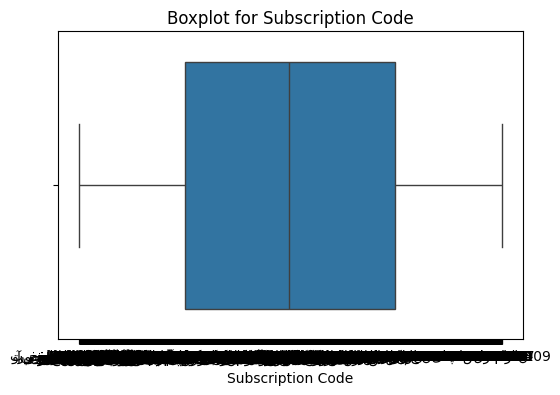

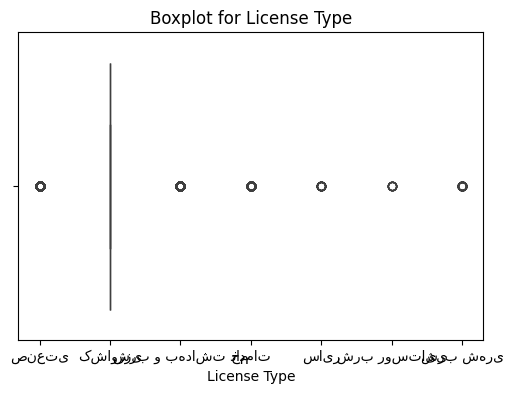

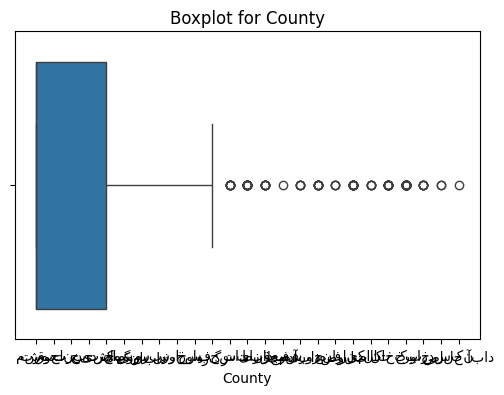

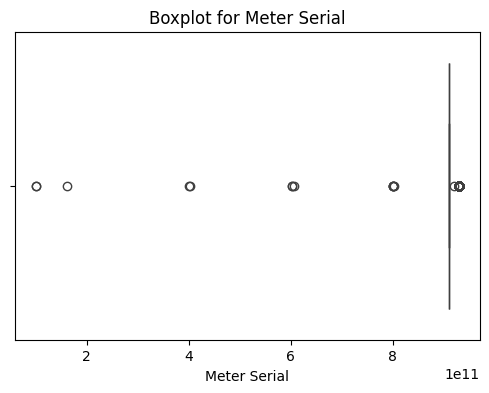

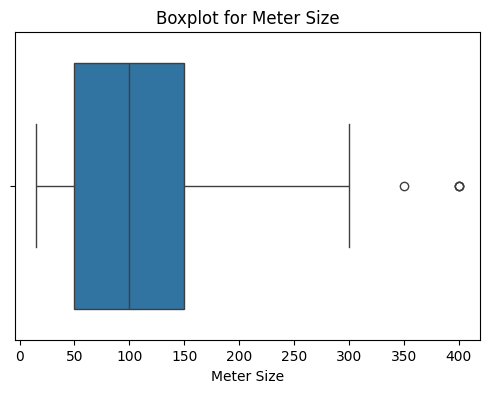

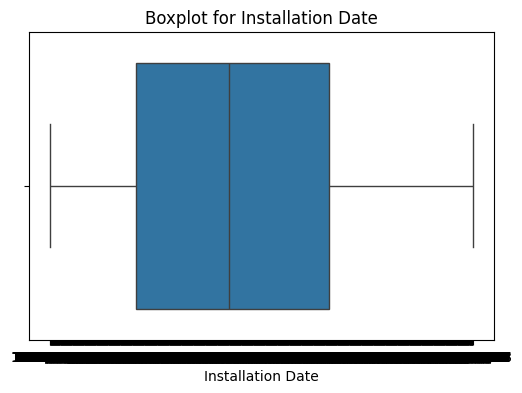

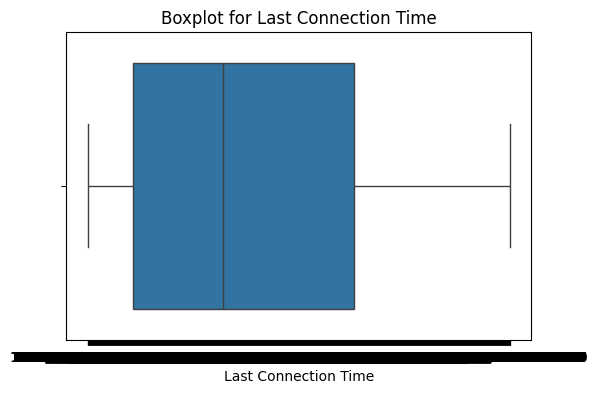

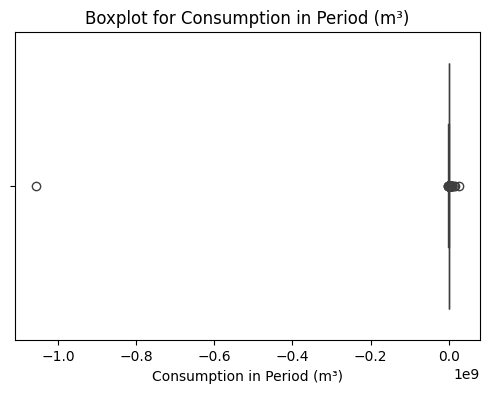

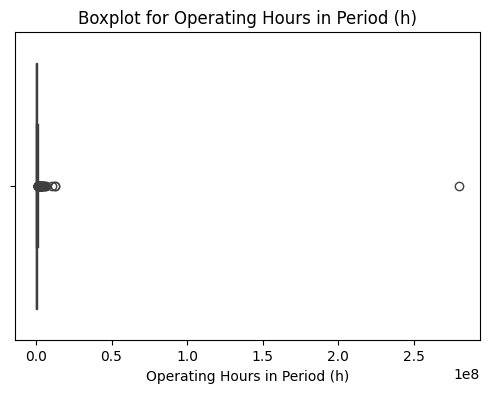

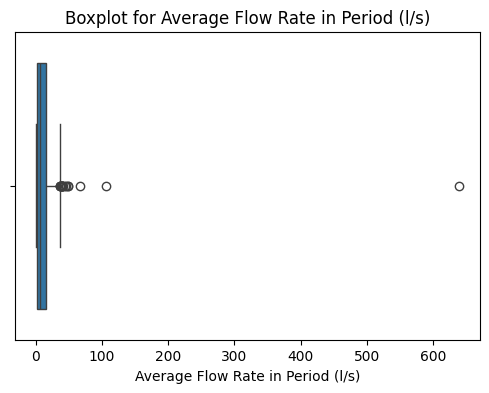

In [53]:
print("📦 Boxplots:")
plot_boxplots(df_info)

In [54]:
df_info

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,9.098011e+11,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15
3,622162,کشاورزی,تربت حیدریه,9.098011e+11,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91
...,...,...,...,...,...,...,...,...,...,...
2214,925247,کشاورزی,باخرز,9.098010e+11,50.0,1400/03/24,1404/01/28 - 02:10:01,5685.400,56574.8,3.30
2215,518473,کشاورزی,مشهد,9.098010e+11,100.0,1399/06/03,1404/01/28 - 03:01:20,250173.700,909533.1,12.28
2216,201250,NaN,قوچان,9.098010e+11,50.0,1399/07/07,1404/01/28 - 02:10:42,8595.251,3673.9,2.66
2217,925005,کشاورزی,باخرز,9.098010e+11,100.0,1400/03/03,1403/07/29 - 02:04:50,338274.800,437856.7,30.17


In [55]:
df_info.columns

Index(['Subscription Code', 'License Type', 'County', 'Meter Serial',
       'Meter Size', 'Installation Date', 'Last Connection Time',
       'Consumption in Period (m³)', 'Operating Hours in Period (h)',
       'Average Flow Rate in Period (l/s)'],
      dtype='object')

In [56]:
def plot_numeric_outliers(df, col):
    """
    Detect and plot outliers in a numeric column using IQR method.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        col (str): Name of numeric column to analyze
    """
    # Remove NaNs for the analysis
    data = df[[col]].dropna().copy()

    # IQR-based outlier detection
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data['is_outlier'] = (data[col] < lower) | (data[col] > upper)

    # Line plot with outliers highlighted
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x=data.index, y=col, marker='o', label='Normal')
    sns.scatterplot(x=data[data['is_outlier']].index,
                    y=data[data['is_outlier']][col],
                    color='red', s=100, label='Outlier')
    plt.title(f'Outliers in "{col}"')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(5, 6))
    sns.boxplot(y=col, data=data, width=0.3)
    plt.title(f'Boxplot of "{col}"')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


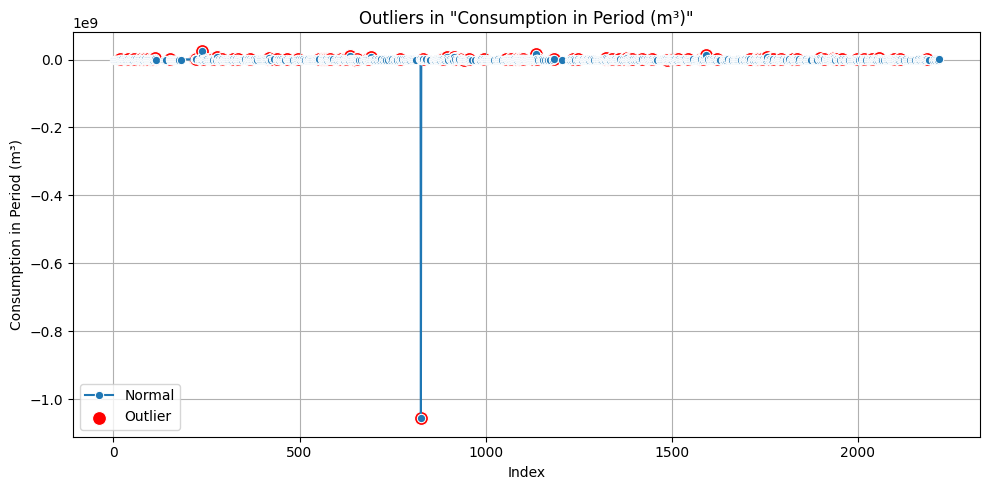

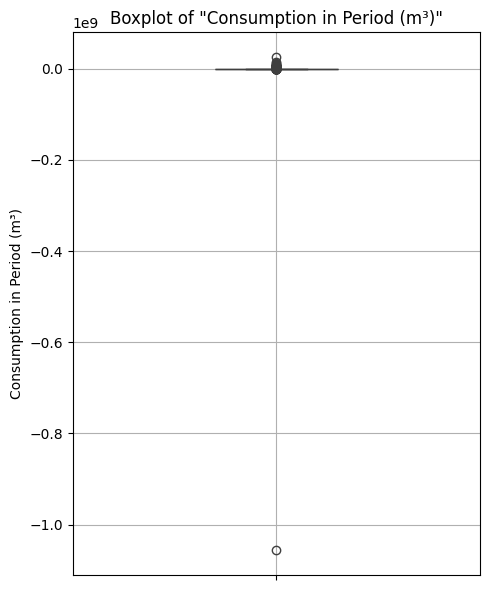

In [57]:
plot_numeric_outliers(df_info,'Consumption in Period (m³)')

In [58]:
def plot_scatter_outliers(df, x_col, y_col, method='iqr', z_thresh=3):
    """
    Plots a scatter plot of two numeric columns and highlights outliers.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): Name of column for X-axis.
        y_col (str): Name of column for Y-axis.
        method (str): Outlier detection method: 'iqr' or 'zscore'.
        z_thresh (float): Threshold for Z-score if method='zscore'.
    """
    data = df[[x_col, y_col]].dropna().copy()

    # Detect outliers
    if method == 'iqr':
        def is_outlier(series):
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            return (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
        data['outlier_x'] = is_outlier(data[x_col])
        data['outlier_y'] = is_outlier(data[y_col])
        data['is_outlier'] = data['outlier_x'] | data['outlier_y']

    elif method == 'zscore':
        from scipy.stats import zscore
        z = data.apply(zscore)
        data['is_outlier'] = (z.abs() > z_thresh).any(axis=1)

    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col,
                    hue='is_outlier',
                    palette={False: 'blue', True: 'red'},
                    s=70)
    plt.title(f'Scatter Plot with Outliers ({method.upper()})')
    plt.legend(title='Outlier')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [50]:
from scipy.stats import zscore

# ========== Univariate Analysis ==========

def summary_statistics(df):
    """Print basic statistics of numeric columns."""
    print(df.describe())

def plot_histograms(df, cols=None, bins=100):
    """Plot histograms for specified or all numeric columns."""
    numeric_cols = cols or df.select_dtypes(include=['number']).columns
    df[numeric_cols].hist(bins=bins, figsize=(15, 10), edgecolor='black')
    plt.suptitle("Histograms of Numeric Columns")
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, cols=None):
    """Plot boxplots for specified or all numeric columns."""
    numeric_cols = cols or df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 5))
        sns.boxplot(y=df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ========== Bivariate Analysis ==========

def plot_scatter_matrix(df, cols=None):
    """Plot scatter matrix for given numeric columns."""
    numeric_cols = cols or df.select_dtypes(include=['number']).columns
    sns.pairplot(df[numeric_cols].dropna())
    plt.suptitle("Scatter Matrix", y=1.02)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    """Plot correlation heatmap for numeric columns."""
    corr = df.select_dtypes(include='number').corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# ========== Outlier Detection ==========

def detect_outliers_iqr(df, col):
    """Return a boolean Series indicating outliers using the IQR method."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[col] < lower) | (df[col] > upper)

def detect_outliers_zscore(df, col, threshold=3):
    """Return a boolean Series indicating outliers using the Z-score method."""
    z_scores = zscore(df[col].dropna())
    return abs(z_scores) > threshold

def plot_outliers_line(df, col):
    """Plot a line plot with IQR outliers marked in red."""
    data = df[[col]].dropna().copy()
    outliers = detect_outliers_iqr(data, col)
    data['outlier'] = outliers

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=data.index, y=data[col], label="Value")
    sns.scatterplot(x=data[outliers].index, y=data[outliers][col], color='red', label="Outlier")
    plt.title(f"Line Plot with Outliers for {col}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [51]:
summary_statistics(df_info[['Consumption in Period (m³)','Average Flow Rate in Period (l/s)','Operating Hours in Period (h)']])

       Consumption in Period (m³)  Average Flow Rate in Period (l/s)  \
count                1.319000e+03                        1181.000000   
mean                -5.168729e+05                          10.735961   
std                  2.913247e+07                          20.913950   
min                 -1.056906e+09                           0.100000   
25%                  1.409316e+03                           2.230000   
50%                  3.806005e+04                           6.660000   
75%                  2.354307e+05                          15.780000   
max                  2.600014e+07                         638.800000   

       Operating Hours in Period (h)  
count                   1.200000e+03  
mean                    6.590447e+05  
std                     8.113619e+06  
min                     0.000000e+00  
25%                     7.088050e+03  
50%                     1.087736e+05  
75%                     5.249252e+05  
max                     2.798126e+08  


findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font family 'Vazir' not found.
findfont: Font f

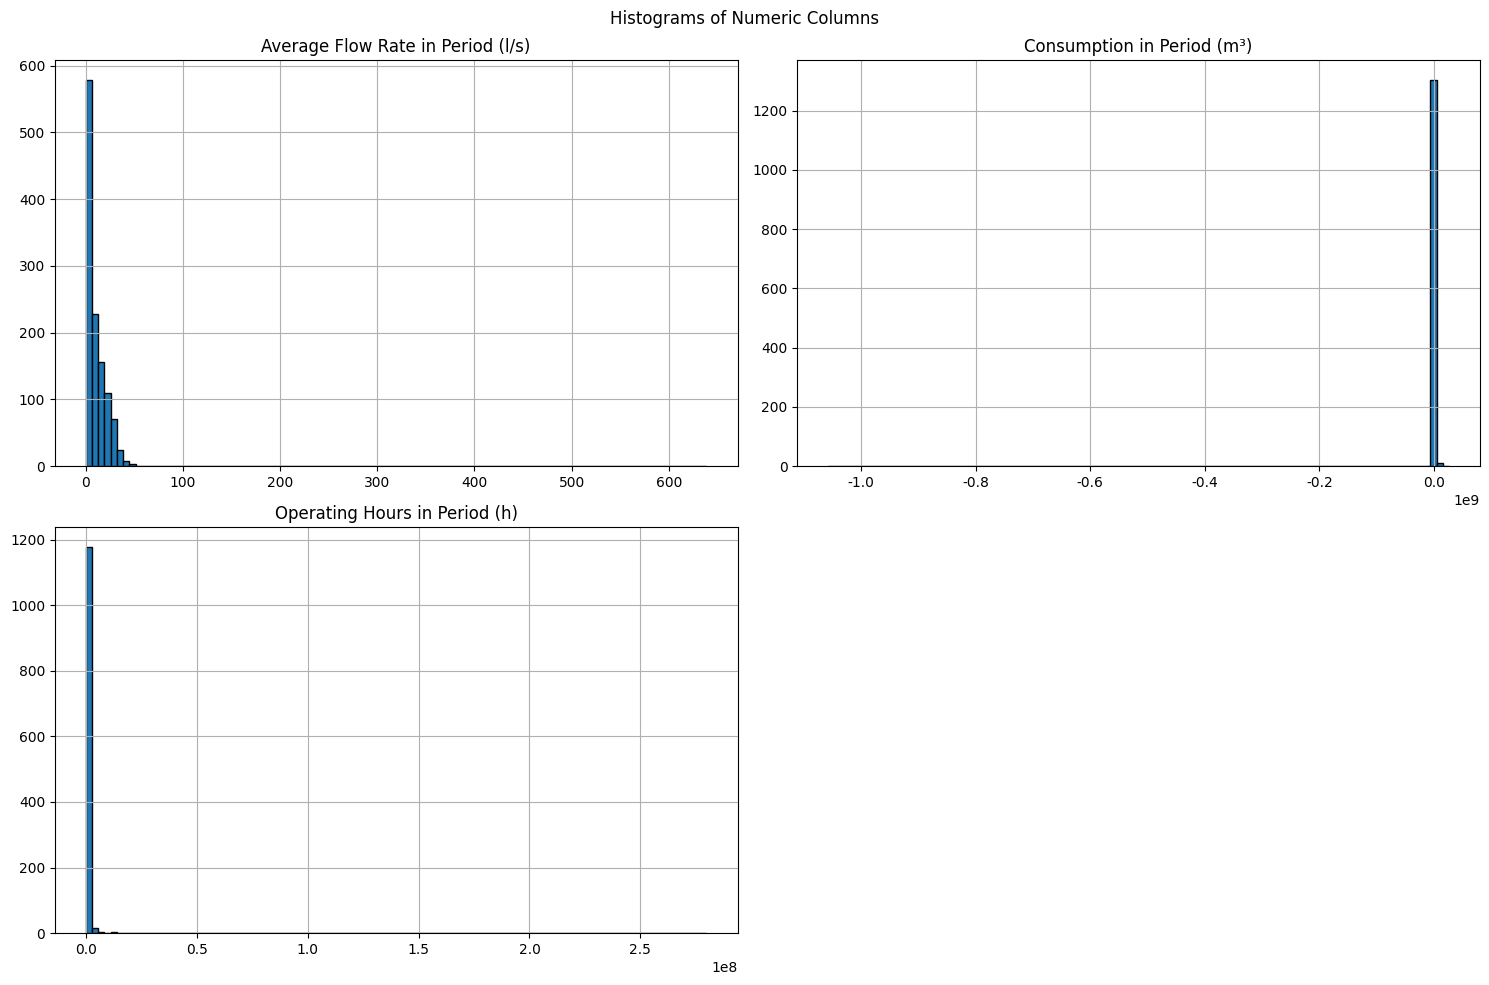

In [54]:
plot_histograms(df_info,cols=["Average Flow Rate in Period (l/s)","Consumption in Period (m³)","Operating Hours in Period (h)"]) 

In [56]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

class InteractiveDataAnalyzer:
    def __init__(self, df):
        self.df = df

    def plot_histogram(self, column, nbins=50):
        fig = px.histogram(self.df, x=column, nbins=nbins, title=f"Histogram of {column}")
        fig.update_layout(bargap=0.1)
        fig.show()

    def plot_boxplot(self, column):
        fig = px.box(self.df, y=column, points="all", title=f"Boxplot of {column}")
        fig.show()

    def plot_scatter(self, x_col, y_col, color_col=None):
        fig = px.scatter(self.df, x=x_col, y=y_col, color=color_col, title=f"Scatter: {x_col} vs {y_col}")
        fig.show()

    def plot_line(self, x_col, y_col):
        fig = px.line(self.df, x=x_col, y=y_col, title=f"Line Chart: {x_col} vs {y_col}")
        fig.show()

    def plot_correlation_heatmap(self):
        numeric_df = self.df.select_dtypes(include='number')
        corr = numeric_df.corr()
        fig = go.Figure(data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='Viridis'
        ))
        fig.update_layout(title='Correlation Heatmap')
        fig.show()

    def plot_parallel_coordinates(self, columns):
        fig = px.parallel_coordinates(self.df, dimensions=columns, title="Parallel Coordinates")
        fig.show()

    def plot_outliers_zscore(self, column, threshold=3):
        from scipy.stats import zscore
        df_clean = self.df[[column]].dropna()
        df_clean['zscore'] = zscore(df_clean[column])
        df_clean['outlier'] = df_clean['zscore'].abs() > threshold
        fig = px.scatter(df_clean, x=df_clean.index, y=column, color='outlier', title=f"Outlier Detection ({column})")
        fig.show()

    def plot_time_series(self, time_col, value_col):
        fig = px.line(self.df.sort_values(time_col), x=time_col, y=value_col, title=f"Time Series of {value_col}")
        fig.show()

    def describe_column(self, column):
        return self.df[column].describe()

    def show_missing_values(self):
        return self.df.isnull().sum().sort_values(ascending=False)

analyzer = InteractiveDataAnalyzer(df_info)
analyzer.plot_histogram("Consumption in Period (m³)")
analyzer.plot_boxplot("Operating Hours in Period (h)")
analyzer.plot_outliers_zscore("Average Flow Rate in Period (l/s)")
analyzer.plot_correlation_heatmap()

In [95]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

class InteractiveDataAnalyzer:
    def __init__(self, df):
        self.df = df

    def filter_by_column_value(self, column, value):
        return self.df[self.df[column] == value]

    def filter_by_range(self, column, min_val=None, max_val=None):
        df_filtered = self.df
        if min_val is not None:
            df_filtered = df_filtered[df_filtered[column] >= min_val]
        if max_val is not None:
            df_filtered = df_filtered[df_filtered[column] <= max_val]
        return df_filtered

    def filter_by_date_range(self, date_column, start_date, end_date):
        df = self.df.copy()
        df[date_column] = pd.to_datetime(df[date_column])
        return df[(df[date_column] >= start_date) & (df[date_column] <= end_date)]

    def plot_histogram(self, column, nbins=50):
        fig = px.histogram(self.df, x=column, nbins=nbins, title=f"Histogram of {column}")
        fig.update_layout(bargap=0.1)
        fig.show()

    def plot_boxplot(self, column):
        fig = px.box(self.df, y=column, points="all", title=f"Boxplot of {column}")
        fig.show()

    def plot_scatter(self, x_col, y_col, color_col=None):
        fig = px.scatter(self.df, x=x_col, y=y_col, color=color_col, title=f"Scatter: {x_col} vs {y_col}")
        fig.show()

    def plot_line(self, x_col, y_col):
        fig = px.line(self.df, x=x_col, y=y_col, title=f"Line Chart: {x_col} vs {y_col}")
        fig.show()

    def plot_correlation_heatmap(self):
        numeric_df = self.df.select_dtypes(include='number')
        corr = numeric_df.corr()
        fig = go.Figure(data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='Viridis'
        ))
        fig.update_layout(title='Correlation Heatmap')
        fig.show()

    def plot_parallel_coordinates(self, columns):
        fig = px.parallel_coordinates(self.df, dimensions=columns, title="Parallel Coordinates")
        fig.show()

    def plot_outliers_zscore(self, column, threshold=3):
        df_clean = self.df[[column]].dropna()
        df_clean['zscore'] = zscore(df_clean[column])
        df_clean['outlier'] = df_clean['zscore'].abs() > threshold
        fig = px.scatter(df_clean, x=df_clean.index, y=column, color='outlier', title=f"Outlier Detection ({column})")
        fig.show()

    def plot_time_series(self, time_col, value_col):
        fig = px.line(self.df.sort_values(time_col), x=time_col, y=value_col, title=f"Time Series of {value_col}")
        fig.show()

    def plot_pie_chart(self, category_col, values_col):
        fig = px.pie(self.df, names=category_col, values=values_col, title=f"Pie Chart of {category_col}")
        fig.show()

    def plot_bar_chart(self, category_col, values_col):
        fig = px.bar(self.df, x=category_col, y=values_col, title=f"Bar Chart of {category_col} vs {values_col}", text_auto=True)
        fig.show()

    def plot_stacked_bar(self, x_col, y_col, color_col):
        fig = px.bar(self.df, x=x_col, y=y_col, color=color_col, title=f"Stacked Bar: {x_col} vs {y_col} by {color_col}", text_auto=True)
        fig.show()

    def plot_consumption_by_license(self, license_col='نوع لایسنس', consumption_col='میزان مصرف', plot_type='box'):
        if plot_type == 'box':
            fig = px.box(self.df, x=license_col, y=consumption_col, points='all',
                         title='مقایسه مصرف آب بر اساس نوع لایسنس')
        elif plot_type == 'bar':
            grouped = self.df.groupby(license_col)[consumption_col].mean().reset_index()
            fig = px.bar(grouped, x=license_col, y=consumption_col,
                         title='میانگین مصرف آب بر اساس نوع لایسنس',
                         text_auto='.2s')
        else:
            raise ValueError("plot_type must be either 'box' or 'bar'")
        fig.update_layout(xaxis_title='نوع لایسنس', yaxis_title='میزان مصرف')
        fig.show()

    def describe_column(self, column):
        return self.df[column].describe()

    def show_missing_values(self):
        return self.df.isnull().sum().sort_values(ascending=False)

    def save_plot_to_html(self, fig, filename="plot.html"):
        fig.write_html(filename)
        print(f"Plot saved to {filename}")

    def statistical_summary(self, column):
        data = self.df[column].dropna()
        return {
            'mean': data.mean(),
            'median': data.median(),
            'std': data.std(),
            'min': data.min(),
            'max': data.max(),
            'skewness': skew(data),
            'kurtosis': kurtosis(data),
            'q1': data.quantile(0.25),
            'q3': data.quantile(0.75),
            'iqr': data.quantile(0.75) - data.quantile(0.25)
        }

    def scale_column(self, column, method='standard'):
        scaler = {
            'minmax': MinMaxScaler(),
            'standard': StandardScaler(),
            'robust': RobustScaler()
        }.get(method, StandardScaler())

        reshaped = self.df[[column]].dropna()
        scaled = scaler.fit_transform(reshaped)
        self.df[column + f'_{method}_scaled'] = pd.Series(scaled.flatten(), index=reshaped.index)
        return self.df[[column, column + f'_{method}_scaled']]

    def normalize_all_numeric(self, method='standard'):
        scaler = {
            'minmax': MinMaxScaler(),
            'standard': StandardScaler(),
            'robust': RobustScaler()
        }.get(method, StandardScaler())

        numeric_cols = self.df.select_dtypes(include='number').columns
        scaled_data = scaler.fit_transform(self.df[numeric_cols])
        scaled_df = pd.DataFrame(scaled_data, columns=[col + f'_{method}_scaled' for col in numeric_cols], index=self.df.index)
        self.df = pd.concat([self.df, scaled_df], axis=1)
        return self.df


In [96]:
def plot_consumption_by_license(df, license_col="str", consumption_col='Str', plot_type='box'):
    """
    Plot water consumption across different license types.

    Parameters:
    - df: pandas DataFrame containing the data
    - license_col: column name for license type
    - consumption_col: column name for water consumption
    - plot_type: 'box' for Box Plot or 'bar' for Bar Chart (mean values)
    """
    if plot_type == 'box':
        fig = px.box(df, x=license_col, y=consumption_col, points='all',
                     title='مقایسه مصرف آب بر اساس نوع پروانه')
    elif plot_type == 'bar':
        grouped = df.groupby(license_col)[consumption_col].mean().reset_index()
        fig = px.bar(grouped, x=license_col, y=consumption_col,
                     title='میانگین مصرف آب بر اساس نوع پروانه',
                     )
    else:
        raise ValueError("plot_type must be either 'box' or 'bar'")
    
    fig.update_layout(xaxis_title='نوع پروانه', yaxis_title='میزان مصرف')
    fig.show()


In [97]:
df_info.columns

Index(['Subscription Code', 'License Type', 'County', 'Meter Serial',
       'Meter Size', 'Installation Date', 'Last Connection Time',
       'Consumption in Period (m³)', 'Operating Hours in Period (h)',
       'Average Flow Rate in Period (l/s)'],
      dtype='object')

In [98]:
plot_consumption_by_license(df_info, license_col="License Type", consumption_col='Consumption in Period (m³)', plot_type='bar')

In [99]:
analyzer.plot_parallel_coordinates(columns=["Consumption in Period (m³)","Operating Hours in Period (h)","Average Flow Rate in Period (l/s)"])

In [100]:
analyzer.show_missing_values()

Average Flow Rate in Period (l/s)    1038
Operating Hours in Period (h)        1019
Consumption in Period (m³)            900
License Type                          652
Last Connection Time                  107
Subscription Code                       1
County                                  1
Meter Serial                            1
Meter Size                              1
Installation Date                       1
dtype: int64

In [101]:
analyzer.plot_outliers_zscore(column="Average Flow Rate in Period (l/s)")

In [102]:
df_info[df_info['Subscription Code'] == "541975"]

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
1957,541975,NaN,مشهد,909801041708.00000,50.00000,1401/06/15,1404/01/28 - 02:08:01,7541.76900,21865.90000,1.43000


In [105]:
df_info.describe()

,Meter Serial,Meter Size,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
count,2218.00000,2218.00000,1319.00000,1200.00000,1181.00000
mean,908972840145.59924,98.50090,-516872.94232,659044.70658,10.73596
std,35468739570.93339,53.63507,29132467.80675,8113618.98739,20.91395
min,100172980628.00000,15.00000,-1056905781.30000,0.00000,0.10000
25%,909801034869.25000,50.00000,1409.31650,7088.05000,2.23000
50%,909801041707.50000,100.00000,38060.05000,108773.60000,6.66000
75%,909801056495.75000,150.00000,235430.65100,524925.25000,15.78000
max,929801001633.00000,400.00000,26000143.80000,279812567.10000,638.80000


In [106]:
clean_analayzing = InteractiveDataAnalyzer(df_info_clean)

In [107]:
clean_analayzing.plot_outliers_zscore(column="Consumption in Period (m³)")

In [108]:
clean_analayzing.plot_histogram(column="Consumption in Period (m³)")

In [109]:
clean_analayzing.plot_correlation_heatmap()

In [110]:
df_info.head()

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,909801058196.00000,50.00000,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,909801034787.00000,80.00000,1400/02/12,1404/01/28 - 02:08:15,23879.93000,343575.40000,1.15000
3,622162,کشاورزی,تربت حیدریه,909801061701.00000,50.00000,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,909801035022.00000,125.00000,1400/02/30,1404/01/28 - 02:10:25,103922.60000,475073.20000,6.91000


In [111]:
clean_analayzing.statistical_summary(column="Operating Hours in Period (h)")

{'mean': 445007.9135160681,
 'median': 116745.35,
 'std': 923682.6284111427,
 'min': 0.0,
 'max': 12681159.4,
 'skewness': 6.98304691417073,
 'kurtosis': 74.51654642796207,
 'q1': 8152.725,
 'q3': 549709.875,
 'iqr': 541557.15}

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

class InteractiveDataAnalyzer:
    def __init__(self, df):
        self.df = df

    def filter_by_column_value(self, column, value):
        return self.df[self.df[column] == value]

    def filter_by_range(self, column, min_val=None, max_val=None):
        df_filtered = self.df
        if min_val is not None:
            df_filtered = df_filtered[df_filtered[column] >= min_val]
        if max_val is not None:
            df_filtered = df_filtered[df_filtered[column] <= max_val]
        return df_filtered

    def filter_by_date_range(self, date_column, start_date, end_date):
        df = self.df.copy()
        df[date_column] = pd.to_datetime(df[date_column])
        return df[(df[date_column] >= start_date) & (df[date_column] <= end_date)]

    def plot_histogram(self, column, nbins=50):
        fig = px.histogram(self.df, x=column, nbins=nbins, title=f"Histogram of {column}")
        fig.update_layout(bargap=0.1)
        fig.show()

    def plot_boxplot(self, column):
        fig = px.box(self.df, y=column, points="all", title=f"Boxplot of {column}")
        fig.show()

    def plot_scatter(self, x_col, y_col, color_col=None):
        fig = px.scatter(self.df, x=x_col, y=y_col, color=color_col, title=f"Scatter: {x_col} vs {y_col}")
        fig.show()

    def plot_line(self, x_col, y_col):
        fig = px.line(self.df, x=x_col, y=y_col, title=f"Line Chart: {x_col} vs {y_col}")
        fig.show()

    def plot_correlation_heatmap(self):
        numeric_df = self.df.select_dtypes(include='number')
        corr = numeric_df.corr()
        fig = go.Figure(data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='Viridis'
        ))
        fig.update_layout(title='Correlation Heatmap')
        fig.show()

    def plot_parallel_coordinates(self, columns):
        fig = px.parallel_coordinates(self.df, dimensions=columns, title="Parallel Coordinates")
        fig.show()

    def plot_outliers_zscore(self, column, threshold=3):
        df_clean = self.df[[column]].dropna()
        df_clean['zscore'] = zscore(df_clean[column])
        df_clean['outlier'] = df_clean['zscore'].abs() > threshold
        fig = px.scatter(df_clean, x=df_clean.index, y=column, color='outlier', title=f"Outlier Detection ({column})")
        fig.show()

    def plot_time_series(self, time_col, value_col):
        fig = px.line(self.df.sort_values(time_col), x=time_col, y=value_col, title=f"Time Series of {value_col}")
        fig.show()

    def plot_pie_chart(self, category_col, values_col):
        fig = px.pie(self.df, names=category_col, values=values_col, title=f"Pie Chart of {category_col}")
        fig.show()

    def plot_bar_chart(self, category_col, values_col):
        fig = px.bar(self.df, x=category_col, y=values_col, title=f"Bar Chart of {category_col} vs {values_col}", text_auto=True)
        fig.show()

    def plot_stacked_bar(self, x_col, y_col, color_col):
        fig = px.bar(self.df, x=x_col, y=y_col, color=color_col, title=f"Stacked Bar: {x_col} vs {y_col} by {color_col}", text_auto=True)
        fig.show()

    def plot_consumption_by_license(self, license_col='نوع لایسنس', consumption_col='میزان مصرف', plot_type='box'):
        if plot_type == 'box':
            fig = px.box(self.df, x=license_col, y=consumption_col, points='all',
                         title='مقایسه مصرف آب بر اساس نوع لایسنس')
        elif plot_type == 'bar':
            grouped = self.df.groupby(license_col)[consumption_col].mean().reset_index()
            fig = px.bar(grouped, x=license_col, y=consumption_col,
                         title='میانگین مصرف آب بر اساس نوع لایسنس',
                         text_auto='.2s')
        else:
            raise ValueError("plot_type must be either 'box' or 'bar'")
        fig.update_layout(xaxis_title='نوع لایسنس', yaxis_title='میزان مصرف')
        fig.show()

    def describe_column(self, column):
        return self.df[column].describe()

    def show_missing_values(self):
        return self.df.isnull().sum().sort_values(ascending=False)

    def save_plot_to_html(self, fig, filename="plot.html"):
        fig.write_html(filename)
        print(f"Plot saved to {filename}")

    def statistical_summary(self, column):
        data = self.df[column].dropna()
        return {
            'mean': data.mean(),
            'median': data.median(),
            'std': data.std(),
            'min': data.min(),
            'max': data.max(),
            'skewness': skew(data),
            'kurtosis': kurtosis(data),
            'q1': data.quantile(0.25),
            'q3': data.quantile(0.75),
            'iqr': data.quantile(0.75) - data.quantile(0.25)
        }

    def scale_column(self, column, method='standard'):
        scaler = {
            'minmax': MinMaxScaler(),
            'standard': StandardScaler(),
            'robust': RobustScaler()
        }.get(method, StandardScaler())

        reshaped = self.df[[column]].dropna()
        scaled = scaler.fit_transform(reshaped)
        self.df[column + f'_{method}_scaled'] = pd.Series(scaled.flatten(), index=reshaped.index)
        return self.df[[column, column + f'_{method}_scaled']]

    def normalize_all_numeric(self, method='standard'):
        scaler = {
            'minmax': MinMaxScaler(),
            'standard': StandardScaler(),
            'robust': RobustScaler()
        }.get(method, StandardScaler())

        numeric_cols = self.df.select_dtypes(include='number').columns
        scaled_data = scaler.fit_transform(self.df[numeric_cols])
        scaled_df = pd.DataFrame(scaled_data, columns=[col + f'_{method}_scaled' for col in numeric_cols], index=self.df.index)
        self.df = pd.concat([self.df, scaled_df], axis=1)
        return self.df


In [128]:
df_info_clean.columns

Index(['Subscription Code', 'License Type', 'County', 'Meter Serial',
       'Meter Size', 'Installation Date', 'Last Connection Time',
       'Consumption in Period (m³)', 'Operating Hours in Period (h)',
       'Average Flow Rate in Period (l/s)'],
      dtype='object')

In [129]:
df_long.columns

Index(['subscrition code', 'Flow Rate (l/s)', 'Number of Negative Flows',
       'Percentage of Negative Flows', 'Operating Hours (h)',
       'Consumption (m³)', 'Number of Available Data Points',
       'تعداد مورد انتظار', 'درصد اطلاعات موجود', 'month'],
      dtype='object')

In [ ]:
df

In [38]:
df_info.rename(columns=column_translations,inplace=True)

In [39]:
df_long.rename(columns=column_translations,inplace=True)

In [41]:
df_info.head()

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,909801058196.00000,50.00000,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,909801034787.00000,80.00000,1400/02/12,1404/01/28 - 02:08:15,23879.93000,343575.40000,1.15000
3,622162,کشاورزی,تربت حیدریه,909801061701.00000,50.00000,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,909801035022.00000,125.00000,1400/02/30,1404/01/28 - 02:10:25,103922.60000,475073.20000,6.91000


In [42]:
df_long.head()

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
1,200654,1.38000,0,0.00000,16492.80000,2727.77000,31,31,100.00000,1401/01
2,622162,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01
3,515618,7.05000,0,0.00000,29319.60000,14647.50000,31,31,100.00000,1401/01
4,529232,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1401/01


In [43]:
df_merged = pd.merge(left=df_long,right=df_info,on="Subscription Code",how="inner")

In [44]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27384 entries, 0 to 27383
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subscription Code                  27384 non-null  object 
 1   Flow Rate (l/s)                    10176 non-null  float64
 2   Number of Negative Flows           27384 non-null  int64  
 3   Percentage of Negative Flows       27384 non-null  float64
 4   Operating Hours (h)                10616 non-null  float64
 5   Consumption (m³)                   13279 non-null  float64
 6   Number of Available Data Points    27384 non-null  int64  
 7   تعداد مورد انتظار                  27384 non-null  int64  
 8   درصد اطلاعات موجود                 27384 non-null  float64
 9   month                              27384 non-null  object 
 10  License Type                       18972 non-null  object 
 11  County                             27384 non-null  obj

Analyzing Water Consumption Data:

Error converting 'month' column to Period objects: Out of bounds nanosecond timestamp: 1401/01, at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Proceeding without time series grouping.

Overall Summary Statistics for Consumption (m³) across all monthly records:
count         13279.00000
mean         -50347.21572
std         9175215.53141
min     -1056962687.88000
25%               6.21100
50%            1741.68000
75%           18301.65000
max         9152365.40000
Name: Consumption (m³), dtype: float64

Number of individual monthly records with negative Consumption (m³): 688
Negative consumption values are present in the data. These might indic

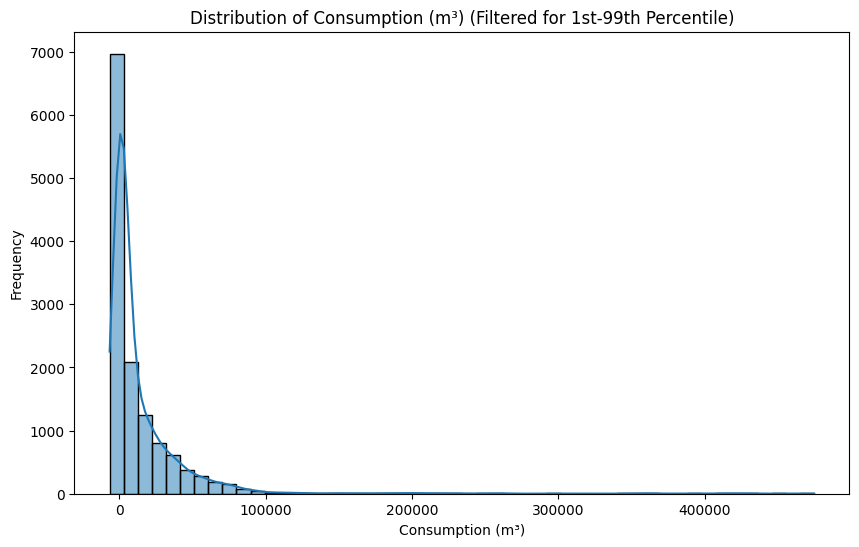

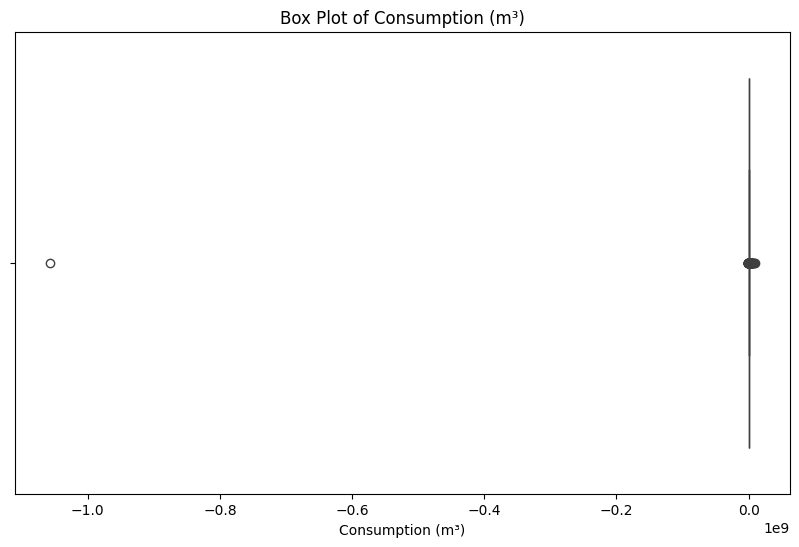


Data Quality Notes:
- Presence of negative consumption values.
- Unexpected correlation between Consumption and Operating Hours.
These aspects should be investigated to ensure the reliability of the analysis.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze water consumption over the 3 years
# The monthly data is in df_merged, specifically the 'Consumption (m³)' column and 'month' column.

print("Analyzing Water Consumption Data:")

# Convert 'month' column to Period objects for proper time series analysis
# This assumes the 'month' column is in 'YYYY/MM' format as seen in the context
try:
    df_merged['month_period'] = pd.to_datetime(df_merged['month'], format='%Y/%m').dt.to_period('M')
    print("\n'month' column successfully converted to Period objects.")
except Exception as e:
    print(f"\nError converting 'month' column to Period objects: {e}")
    print("Proceeding without time series grouping.")
    # If conversion fails, we can still analyze overall statistics
    monthly_consumption = None


# If month conversion was successful, group by month and calculate total consumption
if monthly_consumption is not None:
    monthly_consumption = df_merged.groupby('month_period')['Consumption (m³)'].sum()

    # Sort the monthly consumption by time
    monthly_consumption = monthly_consumption.sort_index()

    # Print summary statistics for monthly total consumption
    print("\nSummary Statistics for Monthly Total Consumption (m³):")
    print(monthly_consumption.describe())

    # Plot the monthly total consumption trend
    plt.figure(figsize=(14, 7))
    monthly_consumption.plot(kind='line', marker='o')
    plt.title('Total Water Consumption (m³) Over Time (Monthly Aggregation)')
    plt.xlabel('Month')
    plt.ylabel('Total Consumption (m³)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Also look at overall consumption statistics across all individual monthly records
print("\nOverall Summary Statistics for Consumption (m³) across all monthly records:")
print(df_merged['Consumption (m³)'].describe())

# Check for negative consumption values, as seen in notebook_cell_output_6
negative_consumption_count = df_merged[df_merged['Consumption (m³)'] < 0].shape[0]
print(f"\nNumber of individual monthly records with negative Consumption (m³): {negative_consumption_count}")
if negative_consumption_count > 0:
    print("Negative consumption values are present in the data. These might indicate data errors or specific scenarios.")

# Further analysis ideas based on available columns:
print("\nFurther Analysis Ideas:")
print("- Analyze consumption distribution using histograms or box plots (consider handling outliers/negative values).")
print("- Investigate the records with negative consumption.")
print("- Analyze consumption trends or statistics per 'License Type' or 'County'.")
print("- Explore the relationship between 'Consumption (m³)', 'Operating Hours (h)', and 'Flow Rate (l/s)'. (Note the counter-intuitive negative correlation between Consumption and Operating Hours observed earlier - this needs investigation).")
print("- Analyze the percentage of available data points ('درصد اطلاعات موجود') per customer or month to understand data completeness.")

# Example: Distribution of Consumption (excluding potential extreme outliers for better visualization)
# Define a reasonable range for plotting based on quantiles or domain knowledge
q1 = df_merged['Consumption (m³)'].quantile(0.01)
q99 = df_merged['Consumption (m³)'].quantile(0.99)
consumption_filtered = df_merged[(df_merged['Consumption (m³)'] >= q1) & (df_merged['Consumption (m³)'] <= q99)]

plt.figure(figsize=(10, 6))
sns.histplot(consumption_filtered['Consumption (m³)'].dropna(), bins=50, kde=True)
plt.title('Distribution of Consumption (m³) (Filtered for 1st-99th Percentile)')
plt.xlabel('Consumption (m³)')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot (might still show outliers outside the filtered range)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Consumption (m³)'].dropna())
plt.title('Box Plot of Consumption (m³)')
plt.xlabel('Consumption (m³)')
plt.show()

# Note on data quality:
print("\nData Quality Notes:")
print("- Presence of negative consumption values.")
print("- Unexpected correlation between Consumption and Operating Hours.")
print("These aspects should be investigated to ensure the reliability of the analysis.")


In [50]:
len(df_info[df_info["Consumption in Period (m³)"] < 0])

44

In [57]:
df_info[df_info["Consumption in Period (m³)"] < 0]["Consumption in Period (m³)"].sum()

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
11,517963,کشاورزی,مشهد,909801035486.00000,200.00000,1400/04/02,1404/01/28 - 01:43:22,-310740.49000,1283165.90000,14.41000
30,515611,کشاورزی,مشهد,909801035045.00000,100.00000,1400/02/27,1404/01/28 - 03:10:36,-52838.64000,68066.30000,11.67000
33,302041,شرب و بهداشت دام,گناباد,909801035316.00000,50.00000,1400/04/27,1403/07/13 - 03:11:19,-30.70000,0.00000,NaN
58,516231,صنعتی,مشهد,909801034868.00000,50.00000,1400/03/25,1403/12/08 - 02:10:16,-0.07400,NaN,NaN
61,515828,شرب و بهداشت دام,مشهد,909801033194.00000,50.00000,1399/08/05,1403/10/05 - 02:10:29,-0.02100,0.00000,NaN
157,چاه K,NaN,کاشمر,909801048609.00000,200.00000,1401/12/11,1403/08/14 - 02:39:47,-5105.94200,NaN,NaN
262,514153,کشاورزی,مشهد,909801033115.00000,50.00000,1399/07/24,1404/01/28 - 03:08:22,-17688.98000,286060.00000,7.40000
276,515534,شرب و بهداشت دام,مشهد,909801035315.00000,50.00000,1400/05/03,1401/03/05 - 02:10:32,-0.13300,0.00000,NaN
400,520651,شرب و بهداشت دام,مشهد,909801032265.00000,50.00000,1399/03/12,1404/01/28 - 01:48:00,-1688.82600,34773.40000,0.48000
469,604324,کشاورزی,تربت حیدریه,909801033346.00000,150.00000,1399/09/25,1404/01/28 - 03:10:35,-222770.07000,191514.50000,14.91000


In [53]:
df_info[df_info["Consumption in Period (m³)"] >= 0]["Consumption in Period (m³)"].sum()

378984065.911

In [54]:
378984065.911 +( -1060739476.8269999)

-681755410.9159999

In [55]:
df_info[df_info["Consumption in Period (m³)"] < 0]["Consumption in Period (m³)"].describe()

count            44.00000
mean      -24107715.38243
std       159321216.86529
min     -1056905781.30000
25%          -93299.89250
50%           -3301.60450
75%            -342.25000
max              -0.02100
Name: Consumption in Period (m³), dtype: float64

In [71]:
customers_to_drop = df_info[df_info["Consumption in Period (m³)"] < 0]["Subscription Code"]

In [63]:
df_info[df_info["Operating Hours in Period (h)"] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 33 to 2212
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subscription Code                  51 non-null     object 
 1   License Type                       44 non-null     object 
 2   County                             51 non-null     object 
 3   Meter Serial                       51 non-null     float64
 4   Meter Size                         51 non-null     float64
 5   Installation Date                  51 non-null     object 
 6   Last Connection Time               51 non-null     object 
 7   Consumption in Period (m³)         49 non-null     float64
 8   Operating Hours in Period (h)      51 non-null     float64
 9   Average Flow Rate in Period (l/s)  6 non-null      float64
dtypes: float64(5), object(5)
memory usage: 4.4+ KB


In [68]:
df_info[df_info["Average Flow Rate in Period (l/s)"] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 2 to 2217
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subscription Code                  1181 non-null   object 
 1   License Type                       1039 non-null   object 
 2   County                             1181 non-null   object 
 3   Meter Serial                       1181 non-null   float64
 4   Meter Size                         1181 non-null   float64
 5   Installation Date                  1181 non-null   object 
 6   Last Connection Time               1181 non-null   object 
 7   Consumption in Period (m³)         1181 non-null   float64
 8   Operating Hours in Period (h)      1153 non-null   float64
 9   Average Flow Rate in Period (l/s)  1181 non-null   float64
dtypes: float64(5), object(5)
memory usage: 101.5+ KB


In [73]:
df_info

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,520009,صنعتی,مشهد,909801058196.00000,50.00000,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN
2,200654,کشاورزی,قوچان,909801034787.00000,80.00000,1400/02/12,1404/01/28 - 02:08:15,23879.93000,343575.40000,1.15000
3,622162,کشاورزی,تربت حیدریه,909801061701.00000,50.00000,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN
4,515618,کشاورزی,مشهد,909801035022.00000,125.00000,1400/02/30,1404/01/28 - 02:10:25,103922.60000,475073.20000,6.91000
...,...,...,...,...,...,...,...,...,...,...
2214,925247,کشاورزی,باخرز,909801035013.00000,50.00000,1400/03/24,1404/01/28 - 02:10:01,5685.40000,56574.80000,3.30000
2215,518473,کشاورزی,مشهد,909801032684.00000,100.00000,1399/06/03,1404/01/28 - 03:01:20,250173.70000,909533.10000,12.28000
2216,201250,NaN,قوچان,909801032982.00000,50.00000,1399/07/07,1404/01/28 - 02:10:42,8595.25100,3673.90000,2.66000
2217,925005,کشاورزی,باخرز,909801035005.00000,100.00000,1400/03/03,1403/07/29 - 02:04:50,338274.80000,437856.70000,30.17000


In [75]:
df_info_clean = df_info[~df_info['Subscription Code'].isin(customers_to_drop)]

In [52]:
df_info.to_csv("1401_claean_info.csv")

In [87]:
df_info_1402.rename(columns=column_translations,inplace=True)
df_info_1403.rename(columns=column_translations,inplace=True)

In [55]:
df_long_1402.rename(columns=column_translations,inplace=True)
df_long_1403.rename(columns=column_translations,inplace=True)

In [92]:
df_info_1402[df_info_1402["Consumption in Period (m³)"] < 0 ]

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
20,302105,کشاورزی,گناباد,909801033223.00000,100.00000,1399/08/11,1404/01/28 - 03:12:04,-12113.16000,77783.90000,1.72000
24,517638,کشاورزی,مشهد,909801033054.00000,100.00000,1399/07/24,1404/01/28 - 02:11:09,-9195.10000,0.00000,NaN
39,514059,NaN,مشهد,909801034997.00000,100.00000,1400/06/09,1403/08/27 - 02:02:06,-30946.70000,0.00000,NaN
56,517768,کشاورزی,مشهد,909801032732.00000,150.00000,1399/06/18,1404/01/28 - 03:10:36,-11698.10000,0.00000,NaN
58,516231,صنعتی,مشهد,909801034868.00000,50.00000,1400/03/25,1403/12/08 - 02:10:16,-0.00200,0.00000,0.50000
...,...,...,...,...,...,...,...,...,...,...
2128,518438,کشاورزی,مشهد,909801045370.00000,125.00000,1401/06/02,1404/01/28 - 02:10:44,-61218.30000,0.00000,NaN
2162,514916,کشاورزی,مشهد,909801033881.00000,100.00000,1399/12/06,1404/01/16 - 02:09:04,-18819.20000,0.00000,NaN
2209,515637,کشاورزی,مشهد,909801033627.00000,100.00000,1399/10/11,1404/01/28 - 02:10:33,-81446.30000,0.00000,NaN
2212,516081,کشاورزی,مشهد,909801049773.00000,150.00000,1401/12/18,1404/01/28 - 03:10:38,-12096.21000,782.80000,1.33000


In [93]:
df_info_1403[df_info_1403["Consumption in Period (m³)"] < 0 ]

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
17,911593,شرب و بهداشت دام,تربت جام,909801036862.00000,50.00000,1400/08/04,1404/01/28 - 02:10:55,-23212.42300,115.30000,1.91000
20,302105,کشاورزی,گناباد,909801033223.00000,100.00000,1399/08/11,1404/01/28 - 03:12:04,-3.55300,51.90000,0.10000
24,517638,کشاورزی,مشهد,909801033054.00000,100.00000,1399/07/24,1404/01/28 - 02:11:09,-267504.34900,3138.20000,3.78000
25,515741,کشاورزی,مشهد,909801033142.00000,100.00000,1399/08/12,1404/01/28 - 03:07:25,-476913.17900,2183.40000,11.06000
42,601581,صنعتی,تربت حیدریه,909801035221.00000,50.00000,1400/03/27,1404/01/28 - 03:11:17,-35314.50200,9830.70000,3.52000
...,...,...,...,...,...,...,...,...,...,...
2166,529133,کشاورزی,مشهد,909801050977.00000,125.00000,1402/03/23,1404/01/22 - 03:02:38,-409188.14700,3672.90000,17.95000
2177,804229,کشاورزی,نیشابور,909801046147.00000,125.00000,1401/07/09,1404/01/27 - 01:55:48,-397109.70000,2867.10000,16.12000
2197,602005,کشاورزی,خواف,909801055759.00000,125.00000,1402/08/30,1404/01/28 - 02:14:13,-123367.00000,259.00000,11.46000
2205,14211107,NaN,خرو,929801000190.00000,20.00000,1402/10/23,1404/01/27 - 13:55:25,-1494.34100,0.00000,NaN


In [94]:


df_info_clean_1402 = df_info[~df_info_1402['Subscription Code'].isin(customers_to_drop_1402)]
df_info_clean_1403 = df_info[~df_info_1403['Subscription Code'].isin(customers_to_drop_1403)]


In [58]:
df_info_1402.rename(columns=column_translations,inplace=True)

In [60]:
df_info_1403.rename(columns=column_translations,inplace=True)

In [62]:
df_info_1403.to_csv("1402_clean_info.csv")
df_info_1403.to_csv("1403_clean_info.csv")

In [63]:
df_long_1402

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1402/01
1,200654,0.97000,0,0.00000,141127.10000,2495.07000,31,31,100.00000,1402/01
2,622162,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1402/01
3,515618,NaN,0,0.00000,NaN,NaN,0,31,0.00000,1402/01
4,529232,5.10000,0,0.00000,31856.10000,12316.66000,31,31,100.00000,1402/01
...,...,...,...,...,...,...,...,...,...,...
2213,925247,NaN,0,0.00000,0.00000,0.00000,29,29,100.00000,1402/12
2214,518473,NaN,0,0.00000,0.00000,NaN,29,29,100.00000,1402/12
2215,201250,NaN,0,0.00000,NaN,0.00000,29,29,100.00000,1402/12
2216,925005,17.52000,0,0.00000,22682.60000,559.00000,29,29,100.00000,1402/12


In [64]:
df_long_1402.to_csv("long_usage1402.csv")

In [65]:
df_long_1402.to_csv("long_usage1403.csv")

In [66]:
df_long.to_csv("long_usage1401.csv")

In [67]:
%%markdown
# Documentation for `preprocessing and cleaning.ipynb`

## Purpose
This notebook is dedicated to the initial preprocessing and cleaning of the raw water consumption and meter information data for the years 1401, 1402, and 1403. The primary goal is to prepare the data for subsequent analysis and modeling by handling missing values, correcting data types, addressing inconsistencies, and identifying and removing erroneous data points, particularly negative consumption values.

## Input Data
The notebook utilizes the following raw data files:
- `1401.csv`: Contains long-format usage data for the year 1401.
- `1402.csv`: Contains long-format usage data for the year 1402.
- `1403.csv`: Contains long-format usage data for the year 1403.
- `info_1402.csv`: Contains meter information data for the year 1402.
- `info_1403.csv`: Contains meter information data for the year 1403.

## Steps Performed

1.  **Loading Data:**
    -   The raw CSV files (`1401.csv`, `1402.csv`, `1403.csv`, `info_1402.csv`, `info_1403.csv`) are loaded into pandas DataFrames.
    -   The long-format usage dataframes (`df_long_1401`, `df_long_1402`, `df_long_1403`) are concatenated into a single DataFrame (`df_long`).

2.  **Initial Data Inspection and Exploration:**
    -   Basic checks are performed on the loaded dataframes, including displaying the first few rows (`.head()`), checking data types and non-null values (`.info()`), and generating descriptive statistics (`.describe()`).
    -   The shape of each DataFrame is examined.
    -   Missing values are identified and quantified using `.isnull().sum()`.
    -   Visualizations (histograms, box plots, correlation matrices) are used to understand the distribution of numerical features and identify potential issues like outliers. The `missingno` library is used to visualize missing data patterns.

3.  **Handling Missing Values:**
    -   Columns with a high percentage of missing values are identified.
    -   While specific imputation strategies are not extensively detailed in the provided code snippets, the focus is on understanding the extent and patterns of missing data.

4.  **Data Cleaning and Transformation:**
    -   Column names in the long-format dataframes are translated from Persian to English using a predefined dictionary (`column_translations`) for consistency and ease of use.
    -   The 'month' column is extracted or processed from relevant date columns in the long-format data.
    -   Erroneous data points, specifically rows in the info dataframes (`df_info_1402`, `df_info_1403`) where 'Consumption in Period (m³)' is negative, are identified.

5.  **Filtering Erroneous Data:**
    -   The 'Subscription Code' values corresponding to negative consumption in `df_info_1402` and `df_info_1403` are collected.
    -   Rows in the original `df_info` (assuming `df_info` is a combined or base info dataframe, although not explicitly shown being loaded or created from `info_1402.csv` and `info_1403.csv` in the provided snippets) are filtered to exclude the identified 'Subscription Code' values, creating cleaned info dataframes (`df_info_clean_1402`, `df_info_clean_1403`). *Note: The filtering logic applied to `df_info` using codes from `df_info_1402` and `df_info_1403` might require careful review in the actual code.*

6.  **Saving Cleaned Data:**
    -   The cleaned info dataframes (`df_info_clean_1402`, `df_info_clean_1403`) are saved to CSV files named `1402_clean_info.csv` and `1403_clean_info.csv`, respectively.
    -   The long-format dataframes (`df_long_1402`, `df_long_1403`, `df_long`) are saved to CSV files named `long_usage1402.csv`, `long_usage1403.csv`, and `long_usage1401.csv` (assuming `df_long` corresponds to 1401 data after concatenation, or perhaps `df_long_1401` is saved as `long_usage1401.csv`).

## Key Decisions and Notes
-   Negative values in 'Consumption in Period (m³)' were treated as erroneous data and the corresponding customer records were removed from the info dataframes.
-   Column names were standardized by translating Persian names to English.
-   The notebook performs extensive visual and statistical analysis to understand data quality before cleaning.

## Further Steps
The cleaned dataframes (`df_info_clean_1402`, `df_info_clean_1403`, `df_long_1401`, `df_long_1402`, `df_long_1403`) are now available as CSV files and can be used for subsequent steps such as feature engineering, exploratory data analysis, and building predictive models.


# Documentation for `preprocessing and cleaning.ipynb`

## Purpose
This notebook is dedicated to the initial preprocessing and cleaning of the raw water consumption and meter information data for the years 1401, 1402, and 1403. The primary goal is to prepare the data for subsequent analysis and modeling by handling missing values, correcting data types, addressing inconsistencies, and identifying and removing erroneous data points, particularly negative consumption values.

## Input Data
The notebook utilizes the following raw data files:
- `1401.csv`: Contains long-format usage data for the year 1401.
- `1402.csv`: Contains long-format usage data for the year 1402.
- `1403.csv`: Contains long-format usage data for the year 1403.
- `info_1402.csv`: Contains meter information data for the year 1402.
- `info_1403.csv`: Contains meter information data for the year 1403.

## Steps Performed

1.  **Loading Data:**
    -   The raw CSV files (`1401.csv`, `1402.csv`, `1403.csv`, `info_1402.csv`, `info_1403.csv`) are loaded into pandas DataFrames.
    -   The long-format usage dataframes (`df_long_1401`, `df_long_1402`, `df_long_1403`) are concatenated into a single DataFrame (`df_long`).

2.  **Initial Data Inspection and Exploration:**
    -   Basic checks are performed on the loaded dataframes, including displaying the first few rows (`.head()`), checking data types and non-null values (`.info()`), and generating descriptive statistics (`.describe()`).
    -   The shape of each DataFrame is examined.
    -   Missing values are identified and quantified using `.isnull().sum()`.
    -   Visualizations (histograms, box plots, correlation matrices) are used to understand the distribution of numerical features and identify potential issues like outliers. The `missingno` library is used to visualize missing data patterns.

3.  **Handling Missing Values:**
    -   Columns with a high percentage of missing values are identified.
    -   While specific imputation strategies are not extensively detailed in the provided code snippets, the focus is on understanding the extent and patterns of missing data.

4.  **Data Cleaning and Transformation:**
    -   Column names in the long-format dataframes are translated from Persian to English using a predefined dictionary (`column_translations`) for consistency and ease of use.
    -   The 'month' column is extracted or processed from relevant date columns in the long-format data.
    -   Erroneous data points, specifically rows in the info dataframes (`df_info_1402`, `df_info_1403`) where 'Consumption in Period (m³)' is negative, are identified.

5.  **Filtering Erroneous Data:**
    -   The 'Subscription Code' values corresponding to negative consumption in `df_info_1402` and `df_info_1403` are collected.
    -   Rows in the original `df_info` (assuming `df_info` is a combined or base info dataframe, although not explicitly shown being loaded or created from `info_1402.csv` and `info_1403.csv` in the provided snippets) are filtered to exclude the identified 'Subscription Code' values, creating cleaned info dataframes (`df_info_clean_1402`, `df_info_clean_1403`). *Note: The filtering logic applied to `df_info` using codes from `df_info_1402` and `df_info_1403` might require careful review in the actual code.*

6.  **Saving Cleaned Data:**
    -   The cleaned info dataframes (`df_info_clean_1402`, `df_info_clean_1403`) are saved to CSV files named `1402_clean_info.csv` and `1403_clean_info.csv`, respectively.
    -   The long-format dataframes (`df_long_1402`, `df_long_1403`, `df_long`) are saved to CSV files named `long_usage1402.csv`, `long_usage1403.csv`, and `long_usage1401.csv` (assuming `df_long` corresponds to 1401 data after concatenation, or perhaps `df_long_1401` is saved as `long_usage1401.csv`).

## Key Decisions and Notes
-   Negative values in 'Consumption in Period (m³)' were treated as erroneous data and the corresponding customer records were removed from the info dataframes.
-   Column names were standardized by translating Persian names to English.
-   The notebook performs extensive visual and statistical analysis to understand data quality before cleaning.

## Further Steps
The cleaned dataframes (`df_info_clean_1402`, `df_info_clean_1403`, `df_long_1401`, `df_long_1402`, `df_long_1403`) are now available as CSV files and can be used for subsequent steps such as feature engineering, exploratory data analysis, and building predictive models.


In [68]:
from IPython.display import Markdown, display

markdown_text = """
## Statistical Analysis and Conclusions

Following the initial data loading and inspection, several statistical analyses and visualizations were performed to understand the data quality and characteristics:

-   **Descriptive Statistics:** We used `.describe()` to get summary statistics (mean, median, std, min, max, quartiles) for numerical columns like 'Flow Rate (l/s)', 'Operating Hours (h)', and 'Consumption (m³)' in the long format data, and similar columns in the info dataframes. This helped identify the range and distribution of values and potential outliers.
-   **Missing Value Analysis:** We quantified missing values using `.isnull().sum()` and visualized their patterns using `missingno`. This guided decisions on handling incomplete data.
-   **Correlation Analysis:** A correlation matrix was generated for numerical columns in the long format data (`df_long`). This showed relationships between variables, such as the strong negative correlation between 'Operating Hours (h)' and 'Consumption (m³)' (as seen in cell 60 output), which might indicate data recording issues or specific operational patterns.
-   **Outlier Identification:** Visualizations like histograms and box plots (shown in various cells, e.g., 71, 77, 81, 110) were used to visually inspect the distribution of key numerical features and identify potential outliers.
-   **Analysis of Negative Consumption:** A specific focus was placed on identifying and analyzing rows with negative values in the 'Consumption in Period (m³)' column in the info dataframes (`df_info_1402`, `df_info_1403`). Statistical summaries (mean, min, max, quartiles) for these negative values were calculated (as seen in cell 115 output). The conclusion drawn from this analysis is that negative consumption values are physically impossible and represent erroneous data entries.

**Conclusion:** Based on the statistical analysis and outlier identification, particularly the presence of negative consumption values, it was concluded that these specific records in the info dataframes are invalid. The decision was made to remove these records from the info dataframes to ensure data quality for subsequent analysis and modeling. Other outliers identified through visualizations might require further investigation depending on the specific use case.

## Streamlit App Explanation

A Streamlit application (`app.py`) is located in the current directory. Streamlit is an open-source Python framework used to create and share beautiful, custom web apps for machine learning and data science.

While the specific features and functionality of the `app.py` file are not detailed within this notebook, a typical Streamlit app for a data project like this might include:

-   **Interactive Data Visualization:** Allowing users to explore the cleaned data through interactive plots (histograms, scatter plots, box plots) for different features.
-   **Data Filtering and Exploration:** Providing options to filter the data based on criteria like 'License Type', 'County', 'Meter Size', etc.
-   **Summary Statistics Display:** Presenting key descriptive statistics for selected subsets of the data.
-   **Demonstration of Results:** If a model is built, the app might allow users to input parameters and see predictions, or visualize model performance metrics.
-   **Displaying Cleaned Data:** Showing snippets or summaries of the processed and cleaned dataframes.

To understand the exact features and how the app works, you would need to run the `app.py` file (typically using `streamlit run app.py` in the terminal) and explore its interface, or examine its source code. The app likely utilizes the cleaned data files generated by this notebook (`1402_clean_info.csv`, `1403_clean_info.csv`, etc.) to power its visualizations and features.
"""

display(Markdown(markdown_text))



## Statistical Analysis and Conclusions

Following the initial data loading and inspection, several statistical analyses and visualizations were performed to understand the data quality and characteristics:

-   **Descriptive Statistics:** We used `.describe()` to get summary statistics (mean, median, std, min, max, quartiles) for numerical columns like 'Flow Rate (l/s)', 'Operating Hours (h)', and 'Consumption (m³)' in the long format data, and similar columns in the info dataframes. This helped identify the range and distribution of values and potential outliers.
-   **Missing Value Analysis:** We quantified missing values using `.isnull().sum()` and visualized their patterns using `missingno`. This guided decisions on handling incomplete data.
-   **Correlation Analysis:** A correlation matrix was generated for numerical columns in the long format data (`df_long`). This showed relationships between variables, such as the strong negative correlation between 'Operating Hours (h)' and 'Consumption (m³)' (as seen in cell 60 output), which might indicate data recording issues or specific operational patterns.
-   **Outlier Identification:** Visualizations like histograms and box plots (shown in various cells, e.g., 71, 77, 81, 110) were used to visually inspect the distribution of key numerical features and identify potential outliers.
-   **Analysis of Negative Consumption:** A specific focus was placed on identifying and analyzing rows with negative values in the 'Consumption in Period (m³)' column in the info dataframes (`df_info_1402`, `df_info_1403`). Statistical summaries (mean, min, max, quartiles) for these negative values were calculated (as seen in cell 115 output). The conclusion drawn from this analysis is that negative consumption values are physically impossible and represent erroneous data entries.

**Conclusion:** Based on the statistical analysis and outlier identification, particularly the presence of negative consumption values, it was concluded that these specific records in the info dataframes are invalid. The decision was made to remove these records from the info dataframes to ensure data quality for subsequent analysis and modeling. Other outliers identified through visualizations might require further investigation depending on the specific use case.

## Streamlit App Explanation

A Streamlit application (`app.py`) is located in the current directory. Streamlit is an open-source Python framework used to create and share beautiful, custom web apps for machine learning and data science.

While the specific features and functionality of the `app.py` file are not detailed within this notebook, a typical Streamlit app for a data project like this might include:

-   **Interactive Data Visualization:** Allowing users to explore the cleaned data through interactive plots (histograms, scatter plots, box plots) for different features.
-   **Data Filtering and Exploration:** Providing options to filter the data based on criteria like 'License Type', 'County', 'Meter Size', etc.
-   **Summary Statistics Display:** Presenting key descriptive statistics for selected subsets of the data.
-   **Demonstration of Results:** If a model is built, the app might allow users to input parameters and see predictions, or visualize model performance metrics.
-   **Displaying Cleaned Data:** Showing snippets or summaries of the processed and cleaned dataframes.

To understand the exact features and how the app works, you would need to run the `app.py` file (typically using `streamlit run app.py` in the terminal) and explore its interface, or examine its source code. The app likely utilizes the cleaned data files generated by this notebook (`1402_clean_info.csv`, `1403_clean_info.csv`, etc.) to power its visualizations and features.
